In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
import warnings 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [2]:
bs_df = pd.read_csv('Billionaires Statistics Dataset.csv', sep=';')

# Feature Engineering

In [3]:
pd.set_option('display.max_columns',None)
bs_df.head()

,rank,finalWorth,personName,age,country,city,source,industries,selfMade,gender,title,birthYear,birthMonth,birthDay,cpi_country,gdp_country,gross_primary_education_enrollment_country,life_expectancy_country,total_tax_rate_country,population_country
0,1,211000,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,0,M,Chairman and CEO,1949.0,3.0,5.0,110.05,2.715518e+12,102.5,82.5,60.7,67059887.0
1,2,180000,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,1,M,CEO,1971.0,6.0,28.0,117.24,2.142770e+13,101.8,78.5,36.6,328239523.0
2,3,114000,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,1,M,Chairman and Founder,1964.0,1.0,12.0,117.24,2.142770e+13,101.8,78.5,36.6,328239523.0
3,4,107000,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,1,M,CTO and Founder,1944.0,8.0,17.0,117.24,2.142770e+13,101.8,78.5,36.6,328239523.0
4,5,106000,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,1,M,CEO,1930.0,8.0,30.0,117.24,2.142770e+13,101.8,78.5,36.6,328239523.0


In [4]:
bs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   personName                                  2640 non-null   object 
 3   age                                         2575 non-null   float64
 4   country                                     2602 non-null   object 
 5   city                                        2568 non-null   object 
 6   source                                      2640 non-null   object 
 7   industries                                  2640 non-null   object 
 8   selfMade                                    2640 non-null   int64  
 9   gender                                      2640 non-null   object 
 10  title       

In [5]:
bs_df.isnull().sum()

rank                                             0
finalWorth                                       0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
selfMade                                         0
gender                                           0
title                                         2301
birthYear                                       76
birthMonth                                      76
birthDay                                        76
cpi_country                                    184
gdp_country                                    164
gross_primary_education_enrollment_country     181
life_expectancy_country                        182
total_tax_rate_country                         182
population_country             

In [6]:
bs_df.dropna(subset=['age'], inplace=True)
bs_df['age'] = bs_df['age'].astype(int)

In [7]:
bs_df.dropna(subset=['country'], inplace=True)

In [8]:
bs_df.dropna(subset=['birthYear'], inplace=True)
bs_df['birthYear'] = bs_df['birthYear'].astype(int)

In [9]:
bs_df.dropna(subset=['birthMonth'], inplace=True)
bs_df['birthMonth'] = bs_df['birthMonth'].astype(int)

In [10]:
bs_df.dropna(subset=['birthDay'], inplace=True)
bs_df['birthDay'] = bs_df['birthDay'].astype(int)

In [11]:
bs_df.dropna(subset=['cpi_country'], inplace=True)
bs_df.dropna(subset=['city'], inplace=True)

In [12]:
bs_df.isnull().sum()

rank                                             0
finalWorth                                       0
personName                                       0
age                                              0
country                                          0
city                                             0
source                                           0
industries                                       0
selfMade                                         0
gender                                           0
title                                         2042
birthYear                                        0
birthMonth                                       0
birthDay                                         0
cpi_country                                      0
gdp_country                                      0
gross_primary_education_enrollment_country       0
life_expectancy_country                          0
total_tax_rate_country                           0
population_country             

# Descriptive Analytics

In [13]:
bs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2372 entries, 0 to 2639
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2372 non-null   int64  
 1   finalWorth                                  2372 non-null   int64  
 2   personName                                  2372 non-null   object 
 3   age                                         2372 non-null   int32  
 4   country                                     2372 non-null   object 
 5   city                                        2372 non-null   object 
 6   source                                      2372 non-null   object 
 7   industries                                  2372 non-null   object 
 8   selfMade                                    2372 non-null   int64  
 9   gender                                      2372 non-null   object 
 10  title       

In [14]:
bs_df.shape

(2372, 20)

In [15]:
bs_df.describe()

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,gdp_country,gross_primary_education_enrollment_country,life_expectancy_country,total_tax_rate_country,population_country
count,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2.372000e+03,2372.000000,2372.000000,2372.000000,2.372000e+03
mean,1275.357926,4780.480607,65.042580,0.703626,1957.328415,5.769815,12.271922,128.015223,1.178249e+13,102.871332,78.086172,43.886341,5.146505e+08
std,743.276089,10281.546618,13.112251,0.456754,13.125472,3.715886,9.904044,26.686923,9.565485e+12,4.759048,3.749821,12.021408,5.522063e+08
min,1.000000,1000.000000,18.000000,0.000000,1921.000000,1.000000,1.000000,99.550000,1.367280e+10,84.700000,54.300000,9.900000,6.453970e+05
25%,636.000000,1500.000000,56.000000,0.000000,1948.000000,2.000000,1.000000,117.240000,1.736426e+12,100.200000,77.000000,36.600000,6.705989e+07
50%,1272.000000,2400.000000,65.000000,1.000000,1957.000000,6.000000,11.000000,117.240000,1.991000e+13,101.800000,78.500000,40.800000,3.282395e+08
75%,1905.000000,4300.000000,74.250000,1.000000,1966.000000,9.000000,21.000000,125.080000,2.142770e+13,102.600000,80.900000,59.100000,1.366418e+09
max,2540.000000,211000.000000,101.000000,1.000000,2004.000000,12.000000,31.000000,288.570000,2.142770e+13,142.100000,84.200000,106.300000,1.397715e+09


In [16]:
bs_df.selfMade.value_counts()

1    1669
0     703
Name: selfMade, dtype: int64

In [17]:
bs_df.country.value_counts()

United States    750
China            496
India            157
Germany           87
Russia            79
                ... 
Algeria            1
Portugal           1
Georgia            1
Colombia           1
Armenia            1
Name: country, Length: 63, dtype: int64

In [18]:
bs_df.gender.value_counts()

M    2092
F     280
Name: gender, dtype: int64

In [19]:
bs_df.industries.value_counts()

Finance & Investments         336
Technology                    290
Manufacturing                 285
Fashion & Retail              242
Food & Beverage               185
Healthcare                    185
Diversified                   173
Real Estate                   156
Energy                         93
Media & Entertainment          84
Metals & Mining                68
Automotive                     67
Service                        48
Construction & Engineering     41
Sports                         38
Logistics                      31
Telecom                        28
Gambling & Casinos             22
Name: industries, dtype: int64

In [20]:
bs_df.source.value_counts()

Real estate                            120
Investments                             86
Diversified                             82
Pharmaceuticals                         76
Software                                62
                                      ... 
Cars                                     1
Ticketing service                        1
Transport, engineering, real estate      1
Electronic trading                       1
Tyre manufacturing machinery             1
Name: source, Length: 858, dtype: int64

In [21]:
bs_df.birthMonth.value_counts()

1     503
10    199
9     191
3     186
8     184
7     178
12    166
5     164
2     156
4     153
6     150
11    142
Name: birthMonth, dtype: int64

In [22]:
pd.crosstab(bs_df.gender, bs_df.selfMade)

selfMade,0,1
gender,,
F,198,82
M,505,1587


In [23]:
pd.set_option('display.max_rows',None)
bs_df[['finalWorth', 'personName','industries']].sort_values('finalWorth', ascending=False)[0:299]

,finalWorth,personName,industries
0,211000,Bernard Arnault & family,Fashion & Retail
1,180000,Elon Musk,Automotive
2,114000,Jeff Bezos,Technology
3,107000,Larry Ellison,Technology
4,106000,Warren Buffett,Finance & Investments
5,104000,Bill Gates,Technology
6,94500,Michael Bloomberg,Media & Entertainment
7,93000,Carlos Slim Helu & family,Telecom
8,83400,Mukesh Ambani,Diversified
9,80700,Steve Ballmer,Technology


In [24]:
bs_df.groupby('age')[['finalWorth','personName','selfMade']].min()

,finalWorth,personName,selfMade
age,,,
18,3500,Clemente Del Vecchio,0
21,3500,Luca Del Vecchio,0
26,1400,Alexandra Andresen,0
27,1500,Katharina Andresen,0
28,1100,Ryan Breslow,1
29,2700,Gustav Magnar Witzoe,0
30,1200,Ben Francis,0
32,2700,Evan Spiegel,1
33,1000,Joe Lau,0


In [25]:
bs_df[(bs_df['age'] > 35) & (bs_df['country'] == 'Italy')]

,rank,finalWorth,personName,age,country,city,source,industries,selfMade,gender,title,birthYear,birthMonth,birthDay,cpi_country,gdp_country,gross_primary_education_enrollment_country,life_expectancy_country,total_tax_rate_country,population_country
156,157,11100,Giorgio Armani,88,Italy,Milan,Luxury goods,Fashion & Retail,1,M,NaN,1934,7,11,110.62,2.001244e+12,101.9,82.9,59.1,60297396.0
352,352,6800,Silvio Berlusconi & family,86,Italy,Milan,Media,Diversified,1,M,NaN,1936,9,29,110.62,2.001244e+12,101.9,82.9,59.1,60297396.0
369,365,6700,Massimiliana Landini Aleotti & family,80,Italy,Fiesole,Pharmaceuticals,Healthcare,0,F,NaN,1943,1,1,110.62,2.001244e+12,101.9,82.9,59.1,60297396.0
471,466,5500,Piero Ferrari,77,Italy,Modena,Automobiles,Automotive,0,M,NaN,1945,5,22,110.62,2.001244e+12,101.9,82.9,59.1,60297396.0
481,466,5500,Sergio Stevanato & family,80,Italy,Venice,Medical packaging,Healthcare,1,M,NaN,1943,3,20,110.62,2.001244e+12,101.9,82.9,59.1,60297396.0
485,486,5400,Patrizio Bertelli,77,Italy,Milan,Luxury goods,Fashion & Retail,1,M,NaN,1946,1,1,110.62,2.001244e+12,101.9,82.9,59.1,60297396.0
491,486,5400,Miuccia Prada,73,Italy,Milan,Luxury goods,Fashion & Retail,0,F,"CEO, Fashion Designer",1949,5,10,110.62,2.001244e+12,101.9,82.9,59.1,60297396.0
684,679,4100,Luca Garavoglia,54,Italy,Milan,Spirits,Food & Beverage,0,M,NaN,1969,2,27,110.62,2.001244e+12,101.9,82.9,59.1,60297396.0
714,699,4000,Shaul Shani,68,Italy,Milan,Telecom,Telecom,1,M,NaN,1955,1,1,110.62,2.001244e+12,101.9,82.9,59.1,60297396.0
727,721,3900,Giuseppe De'Longhi & family,83,Italy,Treviso,Coffee makers,Fashion & Retail,0,M,NaN,1939,4,24,110.62,2.001244e+12,101.9,82.9,59.1,60297396.0


# DESCRIPTIVE ANALYSIS

In [26]:
bs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2372 entries, 0 to 2639
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2372 non-null   int64  
 1   finalWorth                                  2372 non-null   int64  
 2   personName                                  2372 non-null   object 
 3   age                                         2372 non-null   int32  
 4   country                                     2372 non-null   object 
 5   city                                        2372 non-null   object 
 6   source                                      2372 non-null   object 
 7   industries                                  2372 non-null   object 
 8   selfMade                                    2372 non-null   int64  
 9   gender                                      2372 non-null   object 
 10  title       

# FINAL WORTH

The average FinalWorth is:  4780.480607082631
The kurtosis of the distribution is:  134.32332792344965
The skewnes of the distribution is:  9.6841471612648


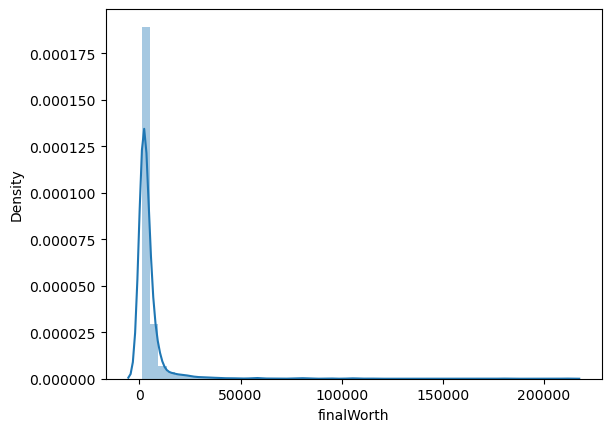

In [27]:
sn.distplot(bs_df.finalWorth)
print('The average FinalWorth is: ', bs_df.finalWorth.mean())
print('The kurtosis of the distribution is: ', bs_df.finalWorth.kurtosis())
print('The skewnes of the distribution is: ', bs_df.finalWorth.skew())


# FINAL WORTH x AGE

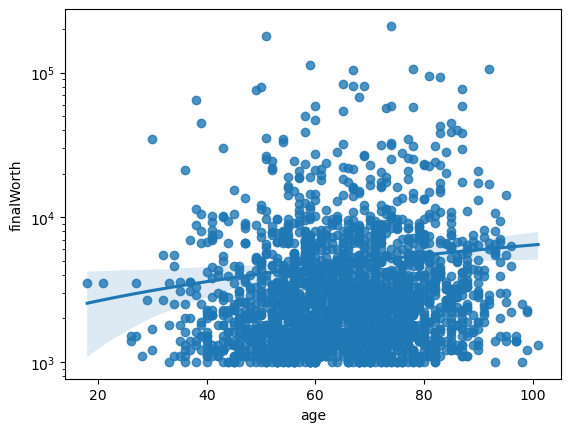

In [28]:
sn.regplot(x='age', y='finalWorth', data=bs_df)
plt.yscale('log')

# FINAL WORTH x INDUSTRIES

<Axes: xlabel='finalWorth', ylabel='industries'>

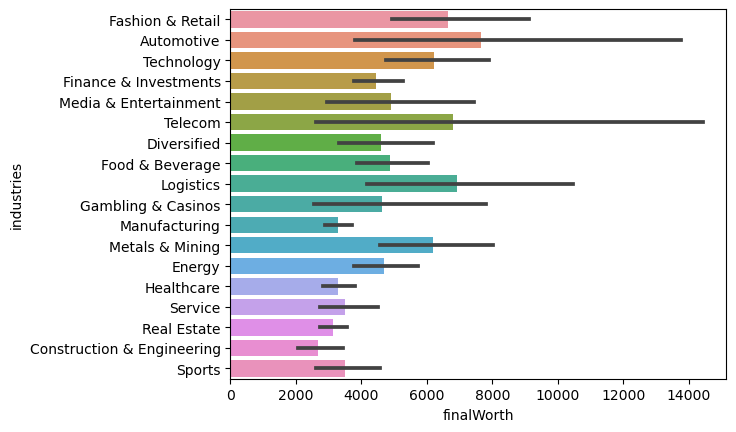

In [29]:
sn.barplot(x='finalWorth', y='industries', data=bs_df)

# FINAL WORTH x SELFMADE x GENDER

The number of Self-made (1) and non-Selfmade (0) is:
 1    1669
0     703
Name: selfMade, dtype: int64
The number of Males (M) and Females (F) is:
 M    2092
F     280
Name: gender, dtype: int64


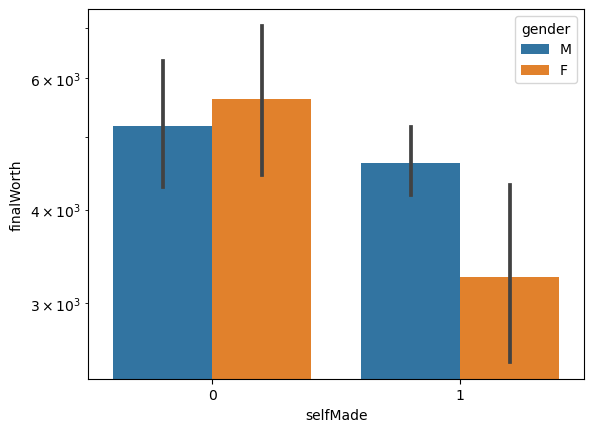

In [30]:
sn.barplot(x='selfMade', y='finalWorth', hue='gender' , data=bs_df);
plt.yscale('log')
print('The number of Self-made (1) and non-Selfmade (0) is:\n', bs_df.selfMade.value_counts())
print('The number of Males (M) and Females (F) is:\n', bs_df.gender.value_counts())

# FINAL WORTH x BIRTH MONTH

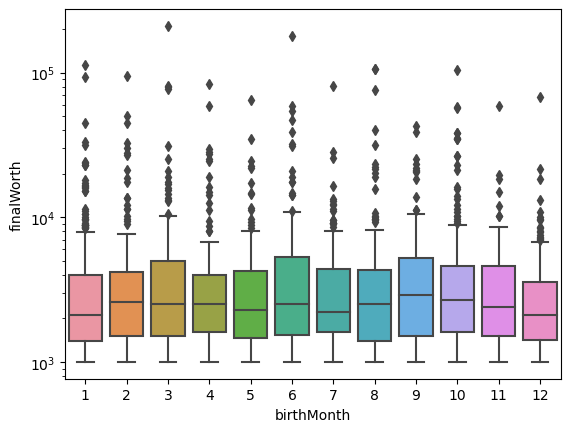

In [31]:
sn.boxplot(x = 'birthMonth', y = 'finalWorth', data = bs_df)
plt.yscale('log')

<Axes: xlabel='birthMonth', ylabel='finalWorth'>

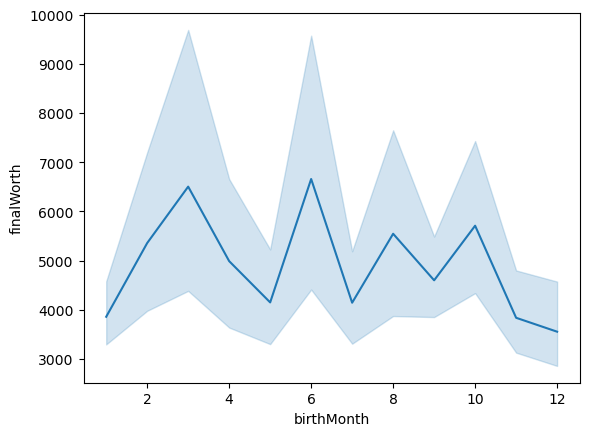

In [32]:
sn.lineplot(x='birthMonth', y='finalWorth', data=bs_df)


# AGE

The average Age is:  65.04258010118043
The kurtosis of the distribution is:  -0.2644121189107702
The skewnes of the distribution is:  -0.03740088509547133


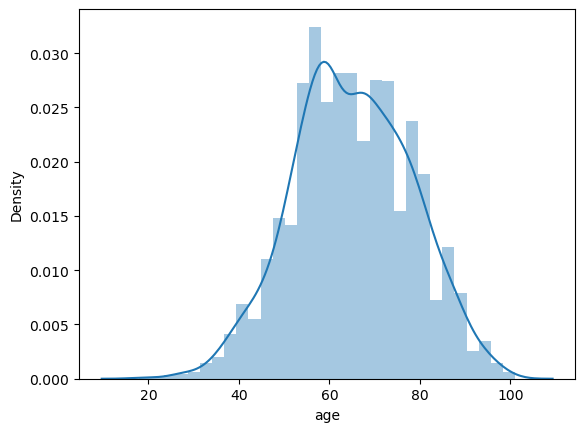

In [33]:
sn.distplot(bs_df.age)
print('The average Age is: ', bs_df.age.mean())
print('The kurtosis of the distribution is: ', bs_df.age.kurtosis())
print('The skewnes of the distribution is: ', bs_df.age.skew())

# AGE x GENDER

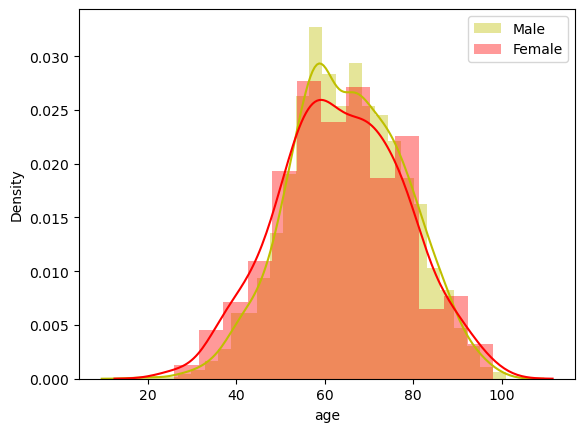

In [34]:
sn.distplot(bs_df[bs_df['gender'] == 'M']['age'], color = 'y', label = 'Male')
sn.distplot(bs_df[bs_df['gender'] == 'F']['age'], color = 'r', label = 'Female');
plt.legend();


# AGE x SELFMADE

<Axes: xlabel='selfMade', ylabel='age'>

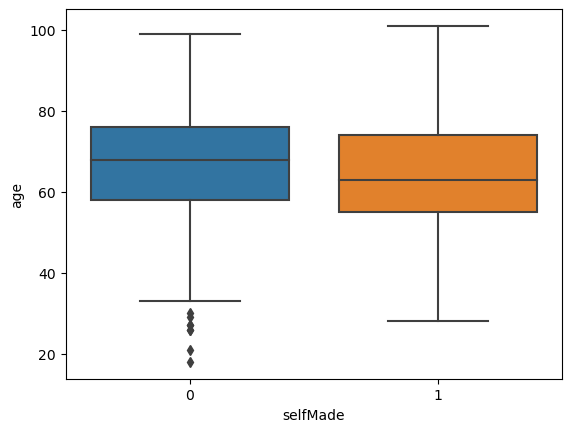

In [35]:
sn.boxplot(x = 'selfMade', y = 'age', data = bs_df)

# AGE x INDUSTRIES

<Axes: xlabel='age', ylabel='industries'>

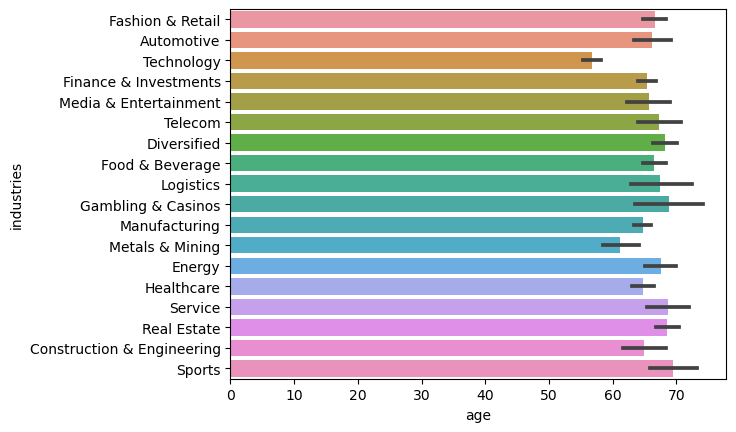

In [36]:
sn.barplot(x='age', y='industries', data=bs_df)

# INDUSTRIES x SELFMADE

<Axes: xlabel='selfMade', ylabel='industries'>

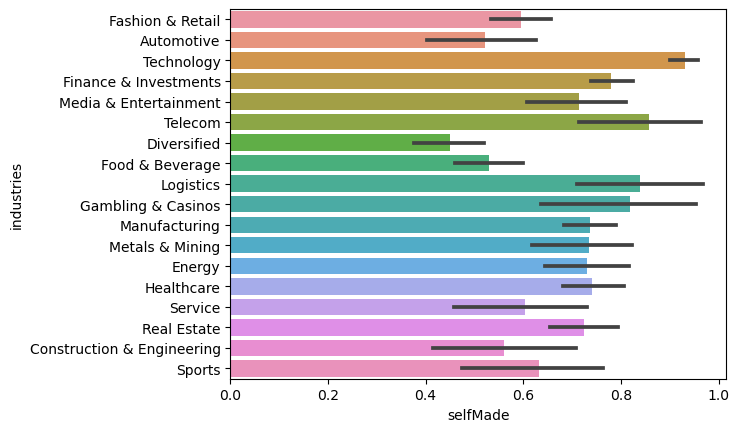

In [37]:
sn.barplot(x='selfMade', y='industries', data=bs_df)

# Linear Regression

In [38]:
bs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2372 entries, 0 to 2639
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2372 non-null   int64  
 1   finalWorth                                  2372 non-null   int64  
 2   personName                                  2372 non-null   object 
 3   age                                         2372 non-null   int32  
 4   country                                     2372 non-null   object 
 5   city                                        2372 non-null   object 
 6   source                                      2372 non-null   object 
 7   industries                                  2372 non-null   object 
 8   selfMade                                    2372 non-null   int64  
 9   gender                                      2372 non-null   object 
 10  title       

In [39]:
Y = bs_df.finalWorth
X_df1 = bs_df.drop('finalWorth', axis = 1)
X_df1.drop(['personName', 'city', 'source', 'birthYear', 'birthDay', 'title', 'rank'], axis=1, inplace=True)


In [40]:
X_df =pd.get_dummies(X_df1, drop_first=True)
X_df.head()

,age,selfMade,birthMonth,cpi_country,gdp_country,gross_primary_education_enrollment_country,life_expectancy_country,total_tax_rate_country,population_country,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bahrain,country_Belgium,country_Brazil,country_Cambodia,country_Canada,country_Chile,country_China,country_Colombia,country_Cyprus,country_Czech Republic,country_Denmark,country_Egypt,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,country_Hungary,country_India,country_Indonesia,country_Israel,country_Italy,country_Japan,country_Kazakhstan,country_Lebanon,country_Luxembourg,country_Malaysia,country_Mexico,country_Morocco,country_Nepal,country_Netherlands,country_New Zealand,country_Nigeria,country_Norway,country_Oman,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Qatar,country_Romania,country_Russia,country_Singapore,country_Slovakia,country_South Africa,country_South Korea,country_Spain,country_Sweden,country_Switzerland,country_Tanzania,country_Thailand,country_Turkey,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Vietnam,industries_Construction & Engineering,industries_Diversified,industries_Energy,industries_Fashion & Retail,industries_Finance & Investments,industries_Food & Beverage,industries_Gambling & Casinos,industries_Healthcare,industries_Logistics,industries_Manufacturing,industries_Media & Entertainment,industries_Metals & Mining,industries_Real Estate,industries_Service,industries_Sports,industries_Technology,industries_Telecom,gender_M
0,74,0,3,110.05,2.715518e+12,102.5,82.5,60.7,67059887.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,51,1,6,117.24,2.142770e+13,101.8,78.5,36.6,328239523.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,59,1,1,117.24,2.142770e+13,101.8,78.5,36.6,328239523.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,78,1,8,117.24,2.142770e+13,101.8,78.5,36.6,328239523.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,92,1,8,117.24,2.142770e+13,101.8,78.5,36.6,328239523.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
X = sm.add_constant(X_df)
X.head()

,const,age,selfMade,birthMonth,cpi_country,gdp_country,gross_primary_education_enrollment_country,life_expectancy_country,total_tax_rate_country,population_country,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bahrain,country_Belgium,country_Brazil,country_Cambodia,country_Canada,country_Chile,country_China,country_Colombia,country_Cyprus,country_Czech Republic,country_Denmark,country_Egypt,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,country_Hungary,country_India,country_Indonesia,country_Israel,country_Italy,country_Japan,country_Kazakhstan,country_Lebanon,country_Luxembourg,country_Malaysia,country_Mexico,country_Morocco,country_Nepal,country_Netherlands,country_New Zealand,country_Nigeria,country_Norway,country_Oman,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Qatar,country_Romania,country_Russia,country_Singapore,country_Slovakia,country_South Africa,country_South Korea,country_Spain,country_Sweden,country_Switzerland,country_Tanzania,country_Thailand,country_Turkey,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Vietnam,industries_Construction & Engineering,industries_Diversified,industries_Energy,industries_Fashion & Retail,industries_Finance & Investments,industries_Food & Beverage,industries_Gambling & Casinos,industries_Healthcare,industries_Logistics,industries_Manufacturing,industries_Media & Entertainment,industries_Metals & Mining,industries_Real Estate,industries_Service,industries_Sports,industries_Technology,industries_Telecom,gender_M
0,1.0,74,0,3,110.05,2.715518e+12,102.5,82.5,60.7,67059887.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.0,51,1,6,117.24,2.142770e+13,101.8,78.5,36.6,328239523.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.0,59,1,1,117.24,2.142770e+13,101.8,78.5,36.6,328239523.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,1.0,78,1,8,117.24,2.142770e+13,101.8,78.5,36.6,328239523.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,1.0,92,1,8,117.24,2.142770e+13,101.8,78.5,36.6,328239523.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [42]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split( X, Y, test_size = 0.3, random_state = 5)

In [43]:
features_for_Backward_Elimination=train_X.columns.drop('const')
features_for_Backward_Elimination

Index(['age', 'selfMade', 'birthMonth', 'cpi_country', 'gdp_country',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'total_tax_rate_country', 'population_country', 'country_Argentina',
       'country_Armenia', 'country_Australia', 'country_Austria',
       'country_Bahrain', 'country_Belgium', 'country_Brazil',
       'country_Cambodia', 'country_Canada', 'country_Chile', 'country_China',
       'country_Colombia', 'country_Cyprus', 'country_Czech Republic',
       'country_Denmark', 'country_Egypt', 'country_Finland', 'country_France',
       'country_Georgia', 'country_Germany', 'country_Greece',
       'country_Hungary', 'country_India', 'country_Indonesia',
       'country_Israel', 'country_Italy', 'country_Japan',
       'country_Kazakhstan', 'country_Lebanon', 'country_Luxembourg',
       'country_Malaysia', 'country_Mexico', 'country_Morocco',
       'country_Nepal', 'country_Netherlands', 'country_New Zealand',
       'country_Nigeria',

In [44]:
def backward_elimination(model, Y, X, features, correlation_threshold=0.7):
    while True:
        if len(features) == 0:
            print("No features left.")
            return features

        # Calculate correlations
        corr_matrix = X[features].corr()

        # Find highly correlated variables
        correlated_vars = set()
        for i in range(len(features)):
            for j in range(i + 1, len(features)):
                if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
                    correlated_vars.add(features[j])

        if correlated_vars:
            print("Dropping correlated variables:", correlated_vars)
            X = X.drop(columns=correlated_vars)
            features = features.difference(correlated_vars)
        else:
            print("No more correlated variables to drop.")
            return features
# Assuming dad_model, train_Y, train_X, and features_for_Backward_Elimination are defined before this point
significant_Features = backward_elimination(bs_df, train_Y, train_X, features_for_Backward_Elimination)
print(significant_Features)

# Add constant term and fit the final model
train_X_uncorrelated = sm.add_constant(train_X[significant_Features])
bs_model_uncorrelated = sm.OLS(train_Y, train_X_uncorrelated).fit()
bs_model_uncorrelated.summary2()

Dropping correlated variables: {'life_expectancy_country', 'country_China'}
No more correlated variables to drop.
Index(['age', 'birthMonth', 'country_Argentina', 'country_Armenia',
       'country_Australia', 'country_Austria', 'country_Bahrain',
       'country_Belgium', 'country_Brazil', 'country_Cambodia',
       'country_Canada', 'country_Chile', 'country_Colombia', 'country_Cyprus',
       'country_Czech Republic', 'country_Denmark', 'country_Egypt',
       'country_Finland', 'country_France', 'country_Georgia',
       'country_Germany', 'country_Greece', 'country_Hungary', 'country_India',
       'country_Indonesia', 'country_Israel', 'country_Italy', 'country_Japan',
       'country_Kazakhstan', 'country_Lebanon', 'country_Luxembourg',
       'country_Malaysia', 'country_Mexico', 'country_Morocco',
       'country_Nepal', 'country_Netherlands', 'country_New Zealand',
       'country_Nigeria', 'country_Norway', 'country_Oman', 'country_Peru',
       'country_Philippines', 'count

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Ordinary least squares
=====================================================================================================
Model:                          OLS                         Adj. R-squared:                0.053     
Dependent Variable:             finalWorth                  AIC:                           34446.2684
Date:                           2023-12-16 14:40            BIC:                           34505.8287
No. Observations:               1660                        Log-Likelihood:                -17212.   
Df Model:                       10                          F-statistic:                   10.26     
Df Residuals:                   1649                        Prob (F-statistic):            5.97e-17  
R-squared:                      0.059                       Scale:                         5.9786e+07
-----------------------------------------------------------------------------------------------------
                                             Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
-----------------------------------------------------------------------------------------------------
const                                       -305.7582 1603.1774 -0.1907 0.8488  -3450.2362  2838.7197
age                                           52.2430   16.3960  3.1863 0.0015     20.0838    84.4022
birthMonth                                    23.4803   52.9190  0.4437 0.6573    -80.3153   127.2759
country_Argentina                          -1352.5878 4135.1227 -0.3271 0.7436  -9463.2325  6758.0570
country_Armenia                             -253.5099 7265.6907 -0.0349 0.9722 -14504.4620 13997.4422
country_Australia                           -620.9984 1605.5320 -0.3868 0.6990  -3770.0948  2528.0980
country_Austria                             1178.4185 2688.7148  0.4383 0.6612  -4095.2365  6452.0734
country_Bahrain                            -1139.9999 7300.6674 -0.1562 0.8759 -15459.5556 13179.5557
country_Belgium                             -580.8156 5288.8950 -0.1098 0.9126 -10954.4735  9792.8424
country_Brazil                             -1064.0783 1741.3608 -0.6111 0.5412  -4479.5898  2351.4331
country_Cambodia                             -64.7664  190.8865 -0.3393 0.7344   -439.1719   309.6390
country_Canada                              1237.8127 1709.3152  0.7242 0.4691  -2114.8443  4590.4698
country_Chile                               2837.3157 3877.0258  0.7318 0.4644  -4767.0968 10441.7283
country_Colombia                            3823.8441 6820.5482  0.5606 0.5751  -9554.0039 17201.6920
country_Cyprus                             -1998.6240 4378.9016 -0.4564 0.6481 -10587.4176  6590.1696
country_Czech Republic                      1856.6518 3462.9982  0.5361 0.5919  -4935.6855  8648.9890
country_Denmark                             2657.0979 4013.2646  0.6621 0.5080  -5214.5338 10528.7297
country_Egypt                               1408.9322 4479.7055  0.3145 0.7532  -7377.5784 10195.4427
country_Finland                             -854.0173 3835.7667 -0.2226 0.8238  -8377.5042  6669.4695
country_France                              6064.6294 1821.4469  3.3296 0.0009   2492.0368  9637.2221
country_Georgia                             2708.3392 7117.5878  0.3805 0.7036 -11252.1234 16668.8018
country_Germany                             1649.7870 1250.9292  1.3188 0.1874   -803.7902  4103.3641
country_Greece                             -2777.0574 5292.3240 -0.5247 0.5998 -13157.4410  7603.3262
country_Hungary                            -2672.9965 7490.9355 -0.3568 0.7213 -17365.7446 12019.7516
country_India                               1222.4334  913.0238  1.3389 0.1808   -568.3748  3013.2416
country_Indonesia                           2191.0160 2168.4201  1.0104 0.3124  -2062.1311  6444.1631
country_Israel                              -914.3126 1969.4578 -0.4642 0.6425  -4777.2142  2948.5890
country_

In [45]:
features_for_Backward_Elimination2 = train_X_uncorrelated.columns.drop('const')
features_for_Backward_Elimination2

Index(['age', 'birthMonth', 'country_Argentina', 'country_Armenia',
       'country_Australia', 'country_Austria', 'country_Bahrain',
       'country_Belgium', 'country_Brazil', 'country_Cambodia',
       'country_Canada', 'country_Chile', 'country_Colombia', 'country_Cyprus',
       'country_Czech Republic', 'country_Denmark', 'country_Egypt',
       'country_Finland', 'country_France', 'country_Georgia',
       'country_Germany', 'country_Greece', 'country_Hungary', 'country_India',
       'country_Indonesia', 'country_Israel', 'country_Italy', 'country_Japan',
       'country_Kazakhstan', 'country_Lebanon', 'country_Luxembourg',
       'country_Malaysia', 'country_Mexico', 'country_Morocco',
       'country_Nepal', 'country_Netherlands', 'country_New Zealand',
       'country_Nigeria', 'country_Norway', 'country_Oman', 'country_Peru',
       'country_Philippines', 'country_Poland', 'country_Portugal',
       'country_Qatar', 'country_Romania', 'country_Russia',
       'country_Singa

In [46]:
def backward_elimination(model, y, X, features):
    while True:
        if max(model.pvalues[features]) > 0.05:
            drop_variable = model.pvalues[model.pvalues == max(model.pvalues[features])]
            print("Dropping " + drop_variable.index[0] + " and running regression again because pvalue is: " + str(drop_variable[0]))
            X = X.drop(columns = [drop_variable.index[0]])
            features = features.drop(drop_variable.index[0])
            model= sm.OLS(y, X).fit()
        else:
            print("All p values less than 0.05")
            return features
            break;

significant_Features2 = backward_elimination(bs_model_uncorrelated, train_Y, train_X_uncorrelated, features_for_Backward_Elimination2)
print(significant_Features2)

train_X_final = sm.add_constant(train_X_uncorrelated[significant_Features2])
model_final = sm.OLS(train_Y, train_X_final).fit()
model_final.summary2()


Dropping country_Lebanon and running regression again because pvalue is: 0.9733697727970485
Dropping country_Norway and running regression again because pvalue is: 0.965101318385254
Dropping country_Armenia and running regression again because pvalue is: 0.9746056922404924
Dropping country_Tanzania and running regression again because pvalue is: 0.9254803668971614
Dropping country_New Zealand and running regression again because pvalue is: 0.9637950982070986
Dropping country_Belgium and running regression again because pvalue is: 0.9090295560539651
Dropping country_Malaysia and running regression again because pvalue is: 0.9635904811190288
Dropping country_Bahrain and running regression again because pvalue is: 0.9248748708701119
Dropping cpi_country and running regression again because pvalue is: 0.8909724310792329
Dropping country_Sweden and running regression again because pvalue is: 0.9767974733914416
Dropping country_Spain and running regression again because pvalue is: 0.99129280

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.035     
Dependent Variable:       finalWorth            AIC:                     34476.4880
Date:                     2023-12-16 14:40      BIC:                     34530.6337
No. Observations:         1660                  Log-Likelihood:          -17228.   
Df Model:                 9                     F-statistic:             7.667     
Df Residuals:             1650                  Prob (F-statistic):      4.22e-11  
R-squared:                0.040                 Scale:                   6.0921e+07
-----------------------------------------------------------------------------------
                              Coef.    Std.Err.    t    P>|t|    [0.025     0.975] 
-----------------------------------------------------------------------------------
const                       2075.1127 1402.8050  1.4793 0.1393  -676.3529 4826.5784
age                           50.6645   15.5076  3.2671 0.0011    20.2479   81.0811
country_France              6124.5093 1510.5028  4.0546 0.0001  3161.8049 9087.2138
gdp_country                    0.0000    0.0000  3.2870 0.0010     0.0000    0.0000
industries_Diversified      1707.9206  771.6962  2.2132 0.0270   194.3134 3221.5277
industries_Fashion & Retail 1705.6149  636.6819  2.6789 0.0075   456.8253 2954.4045
industries_Metals & Mining  3883.0491 1132.9881  3.4273 0.0006  1660.8030 6105.2951
industries_Technology       2733.9178  646.2084  4.2307 0.0000  1466.4429 4001.3927
selfMade                    -908.2407  445.3025 -2.0396 0.0415 -1781.6583  -34.8231
total_tax_rate_country       -43.3210   16.7033 -2.5936 0.0096   -76.0829  -10.5591
-----------------------------------------------------------------------------------
Omnibus:                 2049.715         Durbin-Watson:            2.073          
Prob(Omnibus):           0.000            Jarque-Bera (JB):         247754.631     
Skew:                    6.563            Prob(JB):                 0.000          
Kurtosis:                61.393           Condition No.:            121275924976075
===================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
[2] The condition number is large, 1.21e+14. This might indicate
that there are strong multicollinearity or other numerical                problems.
"""

# Feature engeneering new dataset

In [3]:
df = pd.read_csv('Billionaires Statistics Dataset 300.csv', sep=';')

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        300 non-null    int64  
 1   finalWorth                                  300 non-null    int64  
 2   personName                                  300 non-null    object 
 3   age                                         300 non-null    int64  
 4   country                                     300 non-null    object 
 5   city                                        300 non-null    object 
 6   source                                      300 non-null    object 
 7   industries                                  300 non-null    object 
 8   selfMade                                    300 non-null    int64  
 9   gender                                      300 non-null    object 
 10  title         

In [5]:
pd.set_option('display.max_columns',None)
df.head(30)

,rank,finalWorth,personName,age,country,city,source,industries,selfMade,gender,title,being_graduated,birthYear,birthMonth,birthDay,cpi_country,gdp_country,gross_primary_education_enrollment_country,life_expectancy_country,total_tax_rate_country,population_country,DIVORCED_YES_NO,n_children,religion,human_rights_respect,democracy_level
0,1,211000,Bernard Arnault & family,74,France,Paris,LVMH,Fashion & Retail,0,M,CEO,1,1949,3,5,110.05,2720000000000,102.5,82.5,60.7,67059887,0,5,Christianity,MEDIUM,Full democracy
1,2,180000,Elon Musk,51,United States,Austin,"Tesla, SpaceX",Automotive,1,M,CEO,1,1971,6,28,117.24,21400000000000,101.8,78.5,36.6,328239523,1,7,Christianity,MEDIUM,Flawed democracy
2,3,114000,Jeff Bezos,59,United States,Medina,Amazon,Technology,1,M,Founder,1,1964,1,12,117.24,21400000000000,101.8,78.5,36.6,328239523,1,4,Christianity,MEDIUM,Flawed democracy
3,4,107000,Larry Ellison,78,United States,Lanai,Oracle,Technology,1,M,Founder,1,1944,8,17,117.24,21400000000000,101.8,78.5,36.6,328239523,1,2,Christianity,MEDIUM,Flawed democracy
4,5,106000,Warren Buffett,92,United States,Omaha,Berkshire Hathaway,Finance & Investments,1,M,CEO,1,1930,8,30,117.24,21400000000000,101.8,78.5,36.6,328239523,0,3,Christianity,MEDIUM,Flawed democracy
5,6,104000,Bill Gates,67,United States,Medina,Microsoft,Technology,1,M,CEO,1,1955,10,28,117.24,21400000000000,101.8,78.5,36.6,328239523,1,3,Christianity,MEDIUM,Flawed democracy
6,7,94500,Michael Bloomberg,81,United States,New York,Bloomberg LP,Media & Entertainment,1,M,CEO,1,1942,2,14,117.24,21400000000000,101.8,78.5,36.6,328239523,1,2,Christianity,MEDIUM,Flawed democracy
7,8,93000,Carlos Slim Helu & family,83,Mexico,Mexico City,Telecom,Telecom,1,M,Chairman,0,1940,1,28,141.54,1260000000000,105.8,75.0,55.1,126014024,1,6,Christianity,LOW,Hybrid regime
8,9,83400,Mukesh Ambani,65,India,Mumbai,Diversified,Diversified,0,M,Founder,1,1957,4,19,180.44,2610000000000,113.0,69.4,49.7,1366417754,1,3,hinduism,LOW,Flawed democracy
9,10,80700,Steve Ballmer,67,United States,Hunts Point,Microsoft,Technology,1,M,Owner,1,1956,3,24,117.24,21400000000000,101.8,78.5,36.6,328239523,1,3,Christianity,MEDIUM,Flawed democracy


In [6]:
df.isnull().sum()

rank                                          0
finalWorth                                    0
personName                                    0
age                                           0
country                                       0
city                                          0
source                                        0
industries                                    0
selfMade                                      0
gender                                        0
title                                         0
being_graduated                               0
birthYear                                     0
birthMonth                                    0
birthDay                                      0
cpi_country                                   0
gdp_country                                   0
gross_primary_education_enrollment_country    0
life_expectancy_country                       0
total_tax_rate_country                        0
population_country                      

# Descriptive analysis new dataset

# HISTOGRAMS

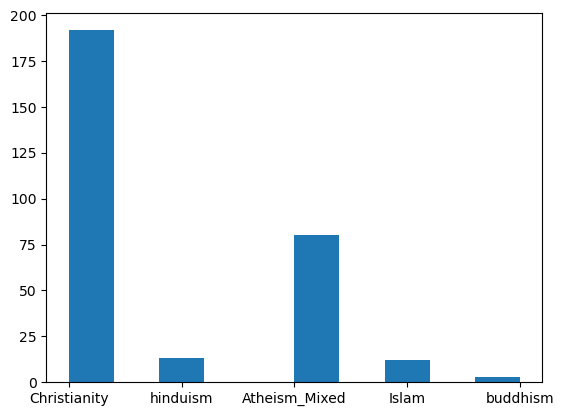

In [7]:
plt.hist(df.religion);

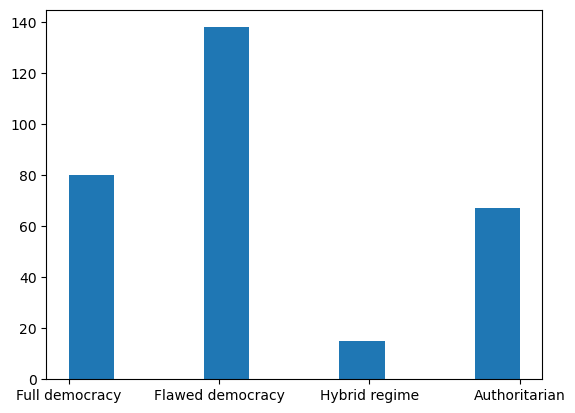

In [8]:
plt.hist(df.democracy_level);

# NEW VARIABLES COMPARED TO FINAL WORTH

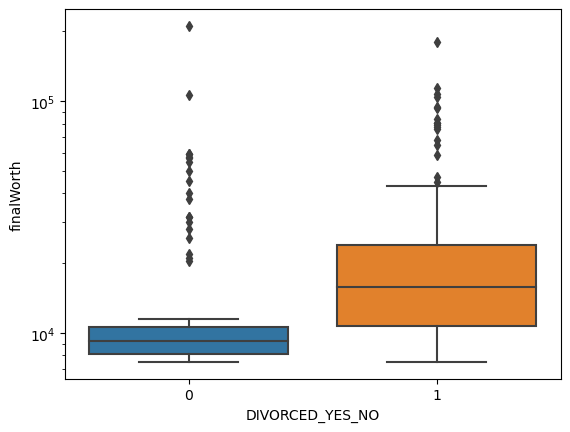

In [9]:
sn.boxplot(x = 'DIVORCED_YES_NO', y = 'finalWorth', data = df)
plt.yscale('log')

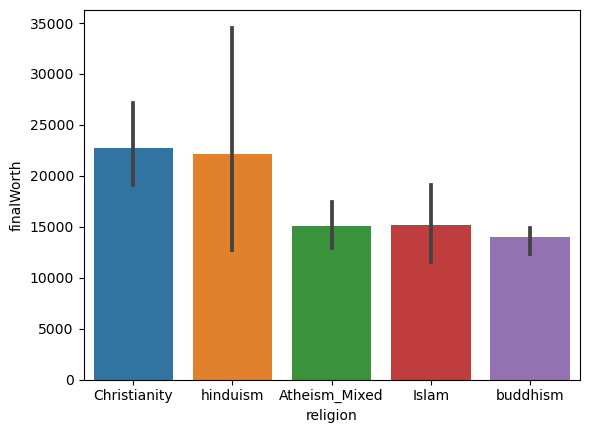

In [10]:
sn.barplot(x='religion', y='finalWorth', data=df);

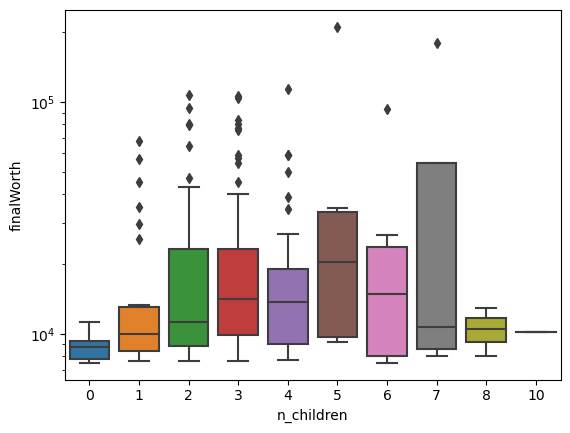

In [11]:
sn.boxplot(x='n_children', y='finalWorth', data=df);
plt.yscale('log')

<Axes: xlabel='human_rights_respect', ylabel='finalWorth'>

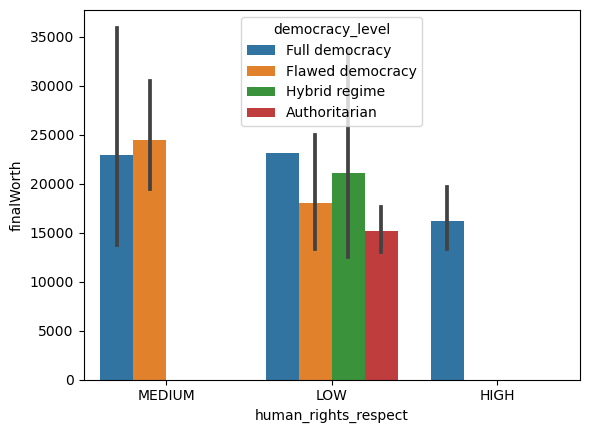

In [12]:
sn.barplot(y='finalWorth', hue=df['democracy_level'], x='human_rights_respect', data=df)


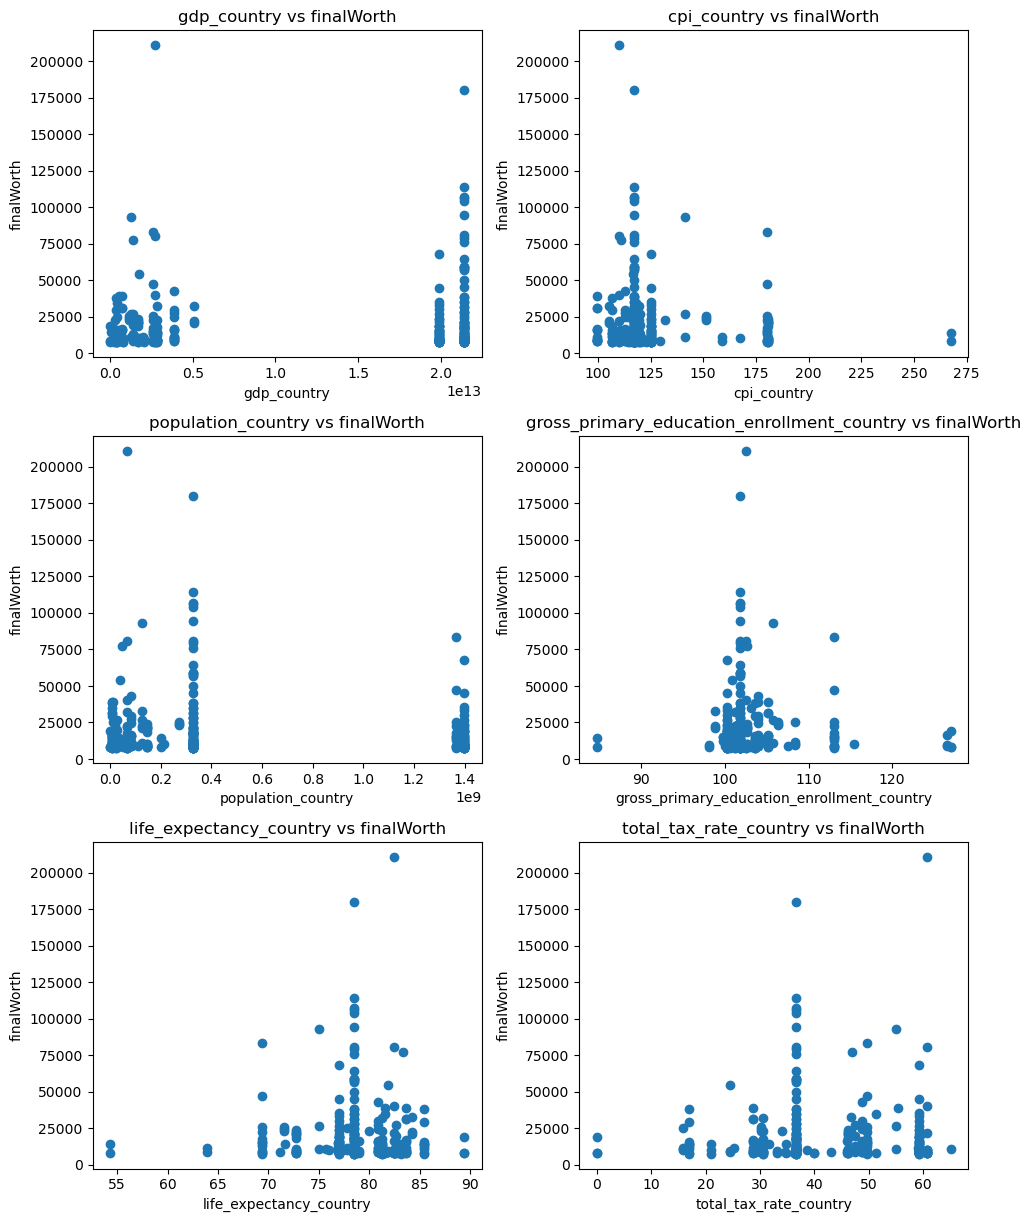

In [13]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df.finalWorth)
    plt.title(x  + ' vs finalWorth')
    plt.ylabel('finalWorth')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('gdp_country', 1)
scatter('cpi_country', 2)
scatter('population_country', 3)
scatter('gross_primary_education_enrollment_country', 4)
scatter('life_expectancy_country', 5)
scatter('total_tax_rate_country', 6)

plt.tight_layout()

<Axes: xlabel='finalWorth', ylabel='title'>

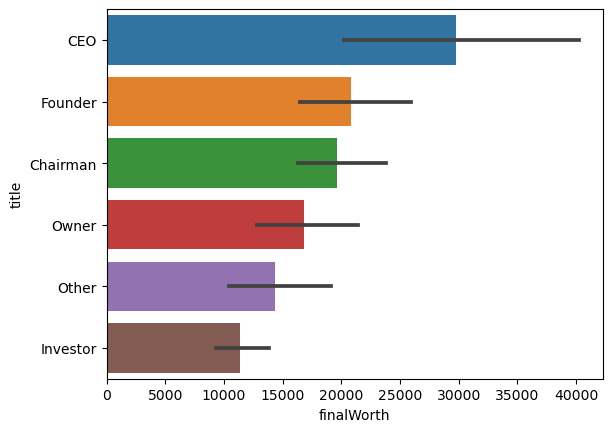

In [14]:
sn.barplot(x='finalWorth', y='title', data=df)

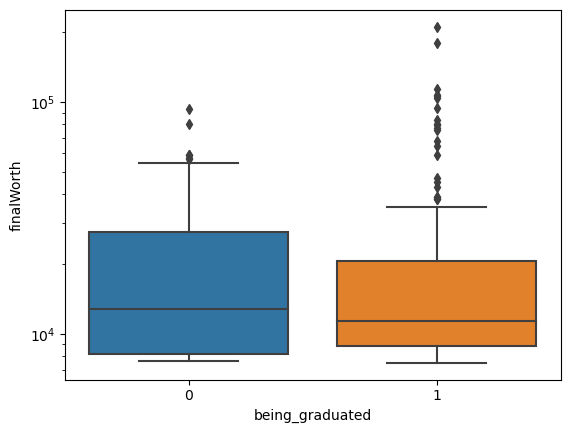

In [15]:
sn.boxplot(x = 'being_graduated', y = 'finalWorth', data = df)
plt.yscale('log')

# LINEAR REGRESSION

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        300 non-null    int64  
 1   finalWorth                                  300 non-null    int64  
 2   personName                                  300 non-null    object 
 3   age                                         300 non-null    int64  
 4   country                                     300 non-null    object 
 5   city                                        300 non-null    object 
 6   source                                      300 non-null    object 
 7   industries                                  300 non-null    object 
 8   selfMade                                    300 non-null    int64  
 9   gender                                      300 non-null    object 
 10  title         

In [42]:
X_df = df.drop('finalWorth', axis = 1)
Y = df["finalWorth"]
X_df.drop(['personName', 'city', 'source', 'birthYear', 'birthDay', 'rank'], axis=1, inplace=True)

In [43]:
X_df =pd.get_dummies(X_df, drop_first=True)
pd.set_option('display.max_columns', None)
X_df.head()

,age,selfMade,being_graduated,birthMonth,cpi_country,gdp_country,gross_primary_education_enrollment_country,life_expectancy_country,total_tax_rate_country,population_country,DIVORCED_YES_NO,n_children,country_Austria,country_Belgium,country_Brazil,country_Canada,country_Chile,country_China,country_Czech Republic,country_France,country_Germany,country_Hong Kong,country_India,country_Indonesia,country_Israel,country_Italy,country_Japan,country_Malaysia,country_Mexico,country_Monaco,country_New Zealand,country_Nigeria,country_Norway,country_Philippines,country_Russia,country_Singapore,country_South Africa,country_South Korea,country_Spain,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uzbekistan,industries_Construction & Engineering,industries_Diversified,industries_Energy,industries_Fashion & Retail,industries_Finance & Investments,industries_Food & Beverage,industries_Gambling & Casinos,industries_Healthcare,industries_Logistics,industries_Manufacturing,industries_Media & Entertainment,industries_Metals & Mining,industries_Real Estate,industries_Service,industries_Sports,industries_Technology,industries_Telecom,gender_M,title_Chairman,title_Founder,title_Investor,title_Other,title_Owner,religion_Christianity,religion_Islam,religion_buddhism,religion_hinduism,human_rights_respect_LOW,human_rights_respect_MEDIUM,democracy_level_Flawed democracy,democracy_level_Full democracy,democracy_level_Hybrid regime
0,74,0,1,3,110.05,2720000000000,102.5,82.5,60.7,67059887,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,51,1,1,6,117.24,21400000000000,101.8,78.5,36.6,328239523,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,59,1,1,1,117.24,21400000000000,101.8,78.5,36.6,328239523,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0
3,78,1,1,8,117.24,21400000000000,101.8,78.5,36.6,328239523,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0
4,92,1,1,8,117.24,21400000000000,101.8,78.5,36.6,328239523,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0


In [44]:
X = sm.add_constant(X_df)

In [45]:
X_df.corr()

,age,selfMade,being_graduated,birthMonth,cpi_country,gdp_country,gross_primary_education_enrollment_country,life_expectancy_country,total_tax_rate_country,population_country,DIVORCED_YES_NO,n_children,country_Austria,country_Belgium,country_Brazil,country_Canada,country_Chile,country_China,country_Czech Republic,country_France,country_Germany,country_Hong Kong,country_India,country_Indonesia,country_Israel,country_Italy,country_Japan,country_Malaysia,country_Mexico,country_Monaco,country_New Zealand,country_Nigeria,country_Norway,country_Philippines,country_Russia,country_Singapore,country_South Africa,country_South Korea,country_Spain,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uzbekistan,industries_Construction & Engineering,industries_Diversified,industries_Energy,industries_Fashion & Retail,industries_Finance & Investments,industries_Food & Beverage,industries_Gambling & Casinos,industries_Healthcare,industries_Logistics,industries_Manufacturing,industries_Media & Entertainment,industries_Metals & Mining,industries_Real Estate,industries_Service,industries_Sports,industries_Technology,industries_Telecom,gender_M,title_Chairman,title_Founder,title_Investor,title_Other,title_Owner,religion_Christianity,religion_Islam,religion_buddhism,religion_hinduism,human_rights_respect_LOW,human_rights_respect_MEDIUM,democracy_level_Flawed democracy,democracy_level_Full democracy,democracy_level_Hybrid regime
age,1.000000,-1.088174e-01,-0.086368,0.017456,-0.054944,-0.085194,0.170520,0.083143,-0.285643,-0.224765,0.044026,0.140809,-0.167229,-0.040537,0.024058,7.423984e-02,0.054202,-0.303888,-1.053727e-01,-0.091886,0.063797,0.193401,0.071470,0.091702,0.006833,0.088653,0.034326,0.058509,0.041810,0.066756,-0.001780,-0.023872,-0.027618,0.024058,-0.080947,-5.587945e-03,0.043231,-0.066574,0.084347,0.066756,0.025145,0.104233,3.931518e-02,-0.133421,0.017903,0.129862,0.006833,0.036977,0.078137,-0.008617,0.171201,0.007292,-0.053592,5.677751e-02,0.028244,0.016618,0.071323,0.155134,-0.046447,0.132019,-0.013072,0.100296,-0.373007,0.046799,0.018644,0.148513,-0.093823,0.005051,-0.039760,-0.036428,0.148224,-0.006283,3.931518e-02,0.071470,-0.123343,0.072895,0.195702,0.020169,1.694641e-01
selfMade,-0.108817,1.000000e+00,0.097811,-0.088786,0.041519,0.218482,-0.192516,-0.088690,0.059518,0.226481,0.038438,-0.024333,-0.028964,-0.081786,0.040893,1.066384e-17,-0.081786,0.270031,-4.623054e-18,-0.266256,-0.178796,0.052523,-0.092611,-0.071067,0.040893,0.040893,0.071067,-0.081786,-0.071067,-0.142134,0.040893,-0.028964,0.040893,0.040893,0.156447,1.645807e-17,-0.115857,-0.028964,0.040893,-0.071067,-0.023153,0.057928,2.508777e-17,0.082199,-0.078223,0.044781,0.040893,0.040893,-0.166282,0.112140,-0.201079,0.105129,-0.184309,8.629700e-18,0.064889,-0.078068,0.117542,-0.102411,-0.029775,-0.040778,0.071067,0.082199,0.198030,0.071067,0.429893,-0.111456,0.362216,0.039881,0.022350,-0.376186,-0.176777,-0.072169,2.508777e-17,-0.092611,0.185864,-0.080146,-0.056750,-0.261171,-1.530867e-17
being_graduated,-0.086368,9.781105e-02,1.000000,0.046950,-0.100485,0.109629,0.077864,0.084004,-0.000888,0.089373,0.202135,0.026181,0.042662,0.030116,-0.111053,-2.944008e-02,0.030116,0.094107,-2.944008e-02,-0.128949,0.076640,0.006044,-0.009058,-0.029440,0.030116,-0.111053,-0.029440,0.030116,-0.029440,0.052338,0.030116,-0.157316,-0.111053,0.030116,-0.000514,5.233791e-02,-0.057327,0.042662,0.030116,0.052338,0.030905,-0.157316,-1.112181e-01,-0.010405,-0.077668,0.047408,0.030116,0.030116,-0.016583,0.022054,-0.082979,0.080327,-0.013111,5.233791e-02,0.082135,-0.027310,-0.103212,-0.115826,-0.005482,-0.013139,0.052338,0.060537,0.036460,-0.111218,0.082979,-0.078235,0.071039,0.032675,-0.077668,-0.034044,-0.000678,-0.101316,-1.112181e-01,-0.009058,0.007880,-0.055769,0.007183,-0.053973,-6.720162e-02
birthMonth,0.017456,-8.878639e-02,0.046950,1.000000,0.046815,0.038267,0.052482,-0.055342,-0.030303,-0.039713,-

In [46]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split( X, Y, test_size = 0.3, random_state = 5)

In [47]:
features_for_backward_elimination=train_X.columns.drop('const')
features_for_backward_elimination

Index(['age', 'selfMade', 'being_graduated', 'birthMonth', 'cpi_country',
       'gdp_country', 'gross_primary_education_enrollment_country',
       'life_expectancy_country', 'total_tax_rate_country',
       'population_country', 'DIVORCED_YES_NO', 'n_children',
       'country_Austria', 'country_Belgium', 'country_Brazil',
       'country_Canada', 'country_Chile', 'country_China',
       'country_Czech Republic', 'country_France', 'country_Germany',
       'country_Hong Kong', 'country_India', 'country_Indonesia',
       'country_Israel', 'country_Italy', 'country_Japan', 'country_Malaysia',
       'country_Mexico', 'country_Monaco', 'country_New Zealand',
       'country_Nigeria', 'country_Norway', 'country_Philippines',
       'country_Russia', 'country_Singapore', 'country_South Africa',
       'country_South Korea', 'country_Spain', 'country_Sweden',
       'country_Switzerland', 'country_Taiwan', 'country_Thailand',
       'country_United Arab Emirates', 'country_United Kingdom'

In [48]:
def backward_elimination(model, Y, X, features, correlation_threshold=0.7):
    while True:
        if len(features) == 0:
            print("No features left.")
            return features

        # Calculate correlations
        corr_matrix = X[features].corr()

        # Find highly correlated variables
        correlated_vars = set()
        for i in range(len(features)):
            for j in range(i + 1, len(features)):
                if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
                    correlated_vars.add(features[j])

        if correlated_vars:
            print("Dropping correlated variables:", correlated_vars)
            X = X.drop(columns=correlated_vars)
            features = features.difference(correlated_vars)
        else:
            print("No more correlated variables to drop.")
            return features
# Assuming dad_model, train_Y, train_X, and features_for_Backward_Elimination are defined before this point
significant_Features = backward_elimination(df, train_Y, train_X, features_for_backward_elimination)
print(significant_Features)

# Add constant term and fit the final model
train_X_uncorrelated = sm.add_constant(train_X[significant_Features])
model_uncorrelated = sm.OLS(train_Y, train_X_uncorrelated).fit()
model_uncorrelated.summary2()

Dropping correlated variables: {'democracy_level_Hybrid regime', 'human_rights_respect_MEDIUM', 'country_United States', 'religion_hinduism', 'democracy_level_Flawed democracy', 'life_expectancy_country', 'country_China'}
No more correlated variables to drop.
Index(['DIVORCED_YES_NO', 'age', 'being_graduated', 'birthMonth',
       'country_Austria', 'country_Belgium', 'country_Brazil',
       'country_Canada', 'country_Chile', 'country_Czech Republic',
       'country_France', 'country_Germany', 'country_Hong Kong',
       'country_India', 'country_Indonesia', 'country_Israel', 'country_Italy',
       'country_Japan', 'country_Malaysia', 'country_Mexico', 'country_Monaco',
       'country_New Zealand', 'country_Nigeria', 'country_Norway',
       'country_Philippines', 'country_Russia', 'country_Singapore',
       'country_South Africa', 'country_South Korea', 'country_Spain',
       'country_Sweden', 'country_Switzerland', 'country_Taiwan',
       'country_Thailand', 'country_United Ar

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Ordinary least squares
=======================================================================================================
Model:                          OLS                          Adj. R-squared:                 0.185     
Dependent Variable:             finalWorth                   AIC:                            4824.8508 
Date:                           2023-12-20 09:50             BIC:                            4898.4872 
No. Observations:               210                          Log-Likelihood:                 -2390.4   
Df Model:                       21                           F-statistic:                    3.259     
Df Residuals:                   188                          Prob (F-statistic):             8.36e-06  
R-squared:                      0.267                        Scale:                          5.0433e+08
-------------------------------------------------------------------------------------------------------
                                              Coef.     Std.Err.     t    P>|t|     [0.025     0.975]  
-------------------------------------------------------------------------------------------------------
const                                        2674.8049  5088.4537  0.5257 0.5997  -7362.9978 12712.6077
DIVORCED_YES_NO                              4584.8253  4000.0312  1.1462 0.2532  -3305.8870 12475.5376
age                                           111.4373   161.2012  0.6913 0.4902   -206.5583   429.4329
being_graduated                             -5214.7738  4640.6931 -1.1237 0.2626 -14369.2959  3939.7484
birthMonth                                    -27.7410   516.4715 -0.0537 0.9572  -1046.5651   991.0830
country_Austria                             -5291.2851 17539.4571 -0.3017 0.7632 -39890.7178 29308.1477
country_Belgium                              7769.7491 21829.2588  0.3559 0.7223 -35292.0152 50831.5135
country_Brazil                              -5285.2817 20726.9966 -0.2550 0.7990 -46172.6546 35602.0912
country_Canada                             -14211.7250 16009.1532 -0.8877 0.3758 -45792.3842 17368.9342
country_Chile                                9663.3255 19969.2365  0.4839 0.6290 -29729.2423 49055.8933
country_Czech Republic                       -249.5003 17348.6813 -0.0144 0.9885 -34472.5968 33973.5961
country_France                              11855.0415 10490.1226  1.1301 0.2599  -8838.4320 32548.5149
country_Germany                            -11664.5063 10573.6357 -1.1032 0.2714 -32522.7230  9193.7105
country_Hong Kong                            8494.7032 10130.3587  0.8385 0.4028 -11489.0774 28478.4838
country_India                               17448.1333 12218.5366  1.4280 0.1549  -6654.9179 41551.1845
country_Indonesia                           12444.7720 21366.2296  0.5825 0.5610 -29703.5920 54593.1359
country_Israel                              -3745.8931 21877.5032 -0.1712 0.8642 -46902.8275 39411.0414
country_Italy                              -11084.5790 21263.6010 -0.5213 0.6028 -53030.4914 30861.3335
country_Japan                                3491.7982 19682.0413  0.1774 0.8594 -35334.2304 42317.8268
country_Malaysia                           -17496.3334 19399.0478 -0.9019 0.3683 -55764.1112 20771.4445
country_Mexico                              -2629.3098 14581.0399 -0.1803 0.8571 -31392.7833 26134.1636
country_Monaco                              -8848.0693 14309.2634 -0.6183 0.5371 -37075.4193 19379.2807
country_New Zealand                             0.0000     0.0000  0.1681 0.8667     -0.0000     0.0000
country_Nigeria                             -7887.2771 10676.7271 -0.7387 0.4610 -28948.8585 13174.3042
country_Norway                              -2533.0388 23356.0093 -0.1085 0.9138 -48606.5671 43540.4894
country_Philippines                            -0.0000     0.0000 -2.3050 0.0223     -0.0000    -0.0000
country_Russia                     

In [49]:
features_for_backward_elimination2 = train_X_uncorrelated.columns.drop('const')
features_for_backward_elimination2

Index(['DIVORCED_YES_NO', 'age', 'being_graduated', 'birthMonth',
       'country_Austria', 'country_Belgium', 'country_Brazil',
       'country_Canada', 'country_Chile', 'country_Czech Republic',
       'country_France', 'country_Germany', 'country_Hong Kong',
       'country_India', 'country_Indonesia', 'country_Israel', 'country_Italy',
       'country_Japan', 'country_Malaysia', 'country_Mexico', 'country_Monaco',
       'country_New Zealand', 'country_Nigeria', 'country_Norway',
       'country_Philippines', 'country_Russia', 'country_Singapore',
       'country_South Africa', 'country_South Korea', 'country_Spain',
       'country_Sweden', 'country_Switzerland', 'country_Taiwan',
       'country_Thailand', 'country_United Arab Emirates',
       'country_United Kingdom', 'country_Uzbekistan', 'cpi_country',
       'democracy_level_Full democracy', 'gdp_country', 'gender_M',
       'gross_primary_education_enrollment_country',
       'human_rights_respect_LOW', 'industries_Construc

In [50]:
def backward_elimination(model, y, X, features):
    while True:
        if max(model.pvalues[features]) > 0.05:
            drop_variable = model.pvalues[model.pvalues == max(model.pvalues[features])]
            print("Dropping " + drop_variable.index[0] + " and running regression again because pvalue is: " + str(drop_variable[0]))
            X = X.drop(columns = [drop_variable.index[0]])
            features = features.drop(drop_variable.index[0])
            model= sm.OLS(y, X).fit()
        else:
            print("All p values less than 0.05")
            return features
            break;

significant_Features2 = backward_elimination(model_uncorrelated, train_Y, train_X_uncorrelated, features_for_backward_elimination2)
print(significant_Features2)

train_X_final = sm.add_constant(train_X_uncorrelated[significant_Features2])
model_final = sm.OLS(train_Y, train_X_final).fit()
model_final.summary2()

Dropping country_South Africa and running regression again because pvalue is: 0.9900667955638613
Dropping gdp_country and running regression again because pvalue is: 0.9845963302391523
Dropping country_Germany and running regression again because pvalue is: 0.981785847690297
Dropping country_Singapore and running regression again because pvalue is: 0.9838680537156526
Dropping country_Israel and running regression again because pvalue is: 0.9863121287446146
Dropping country_Mexico and running regression again because pvalue is: 0.9809906998310921
Dropping gross_primary_education_enrollment_country and running regression again because pvalue is: 0.9878189976659361
Dropping country_Philippines and running regression again because pvalue is: 0.9668401960695694
Dropping country_Monaco and running regression again because pvalue is: 0.9496713232686115
Dropping democracy_level_Full democracy and running regression again because pvalue is: 0.9732559592109874
Dropping country_Norway and running

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       0.083     
Dependent Variable:   finalWorth         AIC:                  4832.8220 
Date:                 2023-12-20 09:50   BIC:                  4846.2104 
No. Observations:     210                Log-Likelihood:       -2412.4   
Df Model:             3                  F-statistic:          7.303     
Df Residuals:         206                Prob (F-statistic):   0.000112  
R-squared:            0.096              Scale:                5.6747e+08
-------------------------------------------------------------------------
                 Coef.     Std.Err.    t    P>|t|    [0.025      0.975]  
-------------------------------------------------------------------------
const          10539.8813  3423.1708 3.0790 0.0024  3790.9402  17288.8224
country_France 21904.5776  7721.5831 2.8368 0.0050  6681.1163  37128.0390
country_Spain  57631.7397 23881.9087 2.4132 0.0167 10547.4422 104716.0373
n_children      3042.7930  1045.0715 2.9116 0.0040   982.3858   5103.2002
-------------------------------------------------------------------------
Omnibus:               194.865         Durbin-Watson:            2.126   
Prob(Omnibus):         0.000           Jarque-Bera (JB):         3444.378
Skew:                  3.655           Prob(JB):                 0.000   
Kurtosis:              21.445          Condition No.:            49      
=========================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
"""

# Logistic Regression

In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from scipy.stats import zscore
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import metrics
#logistic libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sn
from sklearn.model_selection import train_test_split
#Import metrics to create confusion matrix
from sklearn import metrics

In [3]:
df1 = pd.read_csv('Billionaires Statistics Dataset 300.csv', sep=';')

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        300 non-null    int64  
 1   finalWorth                                  300 non-null    int64  
 2   personName                                  300 non-null    object 
 3   age                                         300 non-null    int64  
 4   country                                     300 non-null    object 
 5   city                                        300 non-null    object 
 6   source                                      300 non-null    object 
 7   industries                                  300 non-null    object 
 8   selfMade                                    300 non-null    int64  
 9   gender                                      300 non-null    object 
 10  title         

In [5]:
Y = df1.DIVORCED_YES_NO
X_features = df1.drop('DIVORCED_YES_NO', axis = 1)
X_features.drop(['personName', 'city', 'source', 'birthYear', 'birthDay', 'title', 'rank', 'country', 'industries'], axis=1, inplace=True)
encoded_credit_df =pd.get_dummies(X_features, drop_first=True)
X = sm.add_constant(encoded_credit_df)
X.head()

,const,finalWorth,age,selfMade,being_graduated,birthMonth,cpi_country,gdp_country,gross_primary_education_enrollment_country,life_expectancy_country,...,gender_M,religion_Christianity,religion_Islam,religion_buddhism,religion_hinduism,human_rights_respect_LOW,human_rights_respect_MEDIUM,democracy_level_Flawed democracy,democracy_level_Full democracy,democracy_level_Hybrid regime
0,1.0,211000,74,0,1,3,110.05,2720000000000,102.5,82.5,...,1,1,0,0,0,0,1,0,1,0
1,1.0,180000,51,1,1,6,117.24,21400000000000,101.8,78.5,...,1,1,0,0,0,0,1,1,0,0
2,1.0,114000,59,1,1,1,117.24,21400000000000,101.8,78.5,...,1,1,0,0,0,0,1,1,0,0
3,1.0,107000,78,1,1,8,117.24,21400000000000,101.8,78.5,...,1,1,0,0,0,0,1,1,0,0
4,1.0,106000,92,1,1,8,117.24,21400000000000,101.8,78.5,...,1,1,0,0,0,0,1,1,0,0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [7]:
X_train.corr()

,const,finalWorth,age,selfMade,being_graduated,birthMonth,cpi_country,gdp_country,gross_primary_education_enrollment_country,life_expectancy_country,...,gender_M,religion_Christianity,religion_Islam,religion_buddhism,religion_hinduism,human_rights_respect_LOW,human_rights_respect_MEDIUM,democracy_level_Flawed democracy,democracy_level_Full democracy,democracy_level_Hybrid regime
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
finalWorth,NaN,1.000000,0.039761,-0.068455,0.029045,-0.018244,-0.020671,0.061622,-0.007343,0.010184,...,0.063094,0.123444,-0.043400,-0.028764,0.057380,-0.115312,0.139474,0.089812,0.028705,-0.041265
age,NaN,0.039761,1.000000,-0.131188,-0.107669,0.018133,-0.073900,-0.076890,0.164651,0.101740,...,-0.008848,0.129411,-0.002047,0.044280,0.079532,-0.126308,0.107858,0.221802,-0.001869,0.172528
selfMade,NaN,-0.068455,-0.131188,1.000000,0.022130,-0.000915,0.049845,0.214059,-0.231674,-0.104767,...,0.441400,-0.172981,-0.039535,-0.001221,-0.102260,0.153581,-0.016801,-0.050194,-0.237932,-0.017552
being_graduated,NaN,0.029045,-0.107669,0.022130,1.000000,0.046106,-0.050719,0.064657,0.033661,0.050801,...,0.059456,0.043998,-0.045038,-0.145989,-0.076982,0.016777,-0.077384,-0.052057,-0.019819,0.059614
birthMonth,NaN,-0.018244,0.018133,-0.000915,0.046106,1.000000,0.004434,0.065606,0.039113,-0.059451,...,0.050156,-0.029638,0.046729,-0.022391,-0.019100,0.018353,0.035508,0.109276,-0.143852,0.081087
cpi_country,NaN,-0.020671,-0.073900,0.049845,-0.050719,0.004434,1.000000,-0.140083,0.189530,-0.811423,...,0.055237,-0.169060,0.092513,-0.058058,0.629101,0.522600,-0.328621,0.050583,-0.315339,-0.116233
gdp_country,NaN,0.061622,-0.076890,0.214059,0.064657,0.065606,-0.140083,1.000000,-0.388659,-0.204808,...,0.025096,0.187272,-0.203716,-0.132796,-0.188427,-0.162013,0.425049,0.450287,-0.555990,-0.259660
gross_primary_education_enrollment_country,NaN,-0.007343,0.164651,-0.231674,0.033661,0.039113,0.189530,-0.388659,1.000000,-0.007732,...,-0.025410,0.064989,0.129444,-0.084865,0.451983,0.138775,-0.285264,0.073978,0.083261,0.048440
life_expectancy_country,NaN,0.010184,0.101740,-0.104767,0.050801,-0.059451,-0.811423,-0.204808,-0.007732,1.000000,...,-0.085184,0.187284,-0.243402,-0.059510,-0.516871,-0.464405,0.191000,-0.274790,0.520337,0.286933


In [8]:
features_for_Backward_Elimination=X_train.columns.drop('const')
features_for_Backward_Elimination

Index(['finalWorth', 'age', 'selfMade', 'being_graduated', 'birthMonth',
       'cpi_country', 'gdp_country',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'total_tax_rate_country', 'population_country', 'n_children',
       'gender_M', 'religion_Christianity', 'religion_Islam',
       'religion_buddhism', 'religion_hinduism', 'human_rights_respect_LOW',
       'human_rights_respect_MEDIUM', 'democracy_level_Flawed democracy',
       'democracy_level_Full democracy', 'democracy_level_Hybrid regime'],
      dtype='object')

In [9]:
def backward_elimination(model, Y, X, features, correlation_threshold=0.7):
    while True:
        if len(features) == 0:
            print("No features left.")
            return features

        # Calculate correlations
        corr_matrix = X[features].corr()

        # Find highly correlated variables
        correlated_vars = set()
        for i in range(len(features)):
            for j in range(i + 1, len(features)):
                if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
                    correlated_vars.add(features[j])

        if correlated_vars:
            print("Dropping correlated variables:", correlated_vars)
            X = X.drop(columns=correlated_vars)
            features = features.difference(correlated_vars)
        else:
            print("No more correlated variables to drop.")
            return features
# Assuming dad_model, train_Y, train_X, and features_for_Backward_Elimination are defined before this point
significant_Features = backward_elimination(df1, y_train, X_train, features_for_Backward_Elimination)
print(significant_Features)

Dropping correlated variables: {'human_rights_respect_MEDIUM', 'life_expectancy_country'}
No more correlated variables to drop.
Index(['age', 'being_graduated', 'birthMonth', 'cpi_country',
       'democracy_level_Flawed democracy', 'democracy_level_Full democracy',
       'democracy_level_Hybrid regime', 'finalWorth', 'gdp_country',
       'gender_M', 'gross_primary_education_enrollment_country',
       'human_rights_respect_LOW', 'n_children', 'population_country',
       'religion_Christianity', 'religion_Islam', 'religion_buddhism',
       'religion_hinduism', 'selfMade', 'total_tax_rate_country'],
      dtype='object')


In [10]:
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

         Current function value: 0.559025
         Iterations: 35


In [11]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                          Results: Logit
===================================================================================================
Model:                           Logit                       Method:                      MLE      
Dependent Variable:              DIVORCED_YES_NO             Pseudo R-squared:            0.167    
Date:                            2023-12-20 07:19            AIC:                         280.7904 
No. Observations:                210                         BIC:                         357.7739 
Df Model:                        22                          Log-Likelihood:              -117.40  
Df Residuals:                    187                         LL-Null:                     -140.92  
Converged:                       0.0000                      LLR p-value:                 0.0014485
No. Iterations:                  35.0000                     Scale:                       1.0000   
---------------------------------------------------------------------------------------------------
                                            Coef.   Std.Err.     z    P>|z|     [0.025     0.975]  
---------------------------------------------------------------------------------------------------
const                                      -5.2095    11.7454 -0.4435 0.6574    -28.2300    17.8111
finalWorth                                  0.0000     0.0000  1.2741 0.2026     -0.0000     0.0000
age                                        -0.0087     0.0131 -0.6661 0.5054     -0.0343     0.0169
selfMade                                   -0.1345     0.4313 -0.3119 0.7551     -0.9798     0.7108
being_graduated                             1.2247     0.4325  2.8317 0.0046      0.3770     2.0724
birthMonth                                 -0.0271     0.0475 -0.5711 0.5680     -0.1202     0.0660
cpi_country                                 0.0177     0.0228  0.7739 0.4390     -0.0271     0.0624
gdp_country                                 0.0000     0.0000  1.0187 0.3083     -0.0000     0.0000
gross_primary_education_enrollment_country -0.0263     0.0541 -0.4864 0.6267     -0.1323     0.0797
life_expectancy_country                     0.0647     0.1206  0.5361 0.5919     -0.1718     0.3011
total_tax_rate_country                     -0.0217     0.0268 -0.8097 0.4181     -0.0741     0.0308
population_country                         -0.0000     0.0000 -0.2572 0.7970     -0.0000     0.0000
n_children                                  0.4886     0.1255  3.8931 0.0001      0.2426     0.7346
gender_M                                   -0.0089     0.5287 -0.0169 0.9865     -1.0452     1.0273
religion_Christianity                      -1.1761     0.7545 -1.5588 0.1190     -2.6550     0.3027
religion_Islam                             -1.2257     1.3966 -0.8776 0.3802     -3.9630     1.5117
religion_buddhism                          21.8339 47187.8803  0.0005 0.9996 -92464.7119 92508.3798
religion_hinduism                          -0.2971     2.5468 -0.1167 0.9071     -5.2888     4.6946
human_rights_respect_LOW                   -0.0676     1.5636 -0.0432 0.9655     -3.1322     2.9971
human_rights_respect_MEDIUM                -1.1538     0.7007 -1.6467 0.0996     -2.5271     0.2195
democracy_level_Flawed democracy            1.4372     1.1744  1.2238 0.2210     -0.8646     3.7390
democracy_level_Full democracy              1.2597     1.4901  0.8454 0.3979     -1.6607     4.1802
democracy_level_Hybrid regime              -0.1026     1.3410 -0.0765 0.9390     -2.7308     2.5256
===================================================================================================

"""

In [12]:
significant_vars = ['being_graduated', 'n_children'] 

In [13]:
final_logit = sm.Logit(y_train, sm.add_constant(X_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.605711
         Iterations 5


In [14]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: DIVORCED_YES_NO  Pseudo R-squared: 0.097     
Date:               2023-12-20 07:19 AIC:              260.3987  
No. Observations:   210              BIC:              270.4401  
Df Model:           2                Log-Likelihood:   -127.20   
Df Residuals:       207              LL-Null:          -140.92   
Converged:          1.0000           LLR p-value:      1.1028e-06
No. Iterations:     5.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -1.5721   0.4518 -3.4794 0.0005 -2.4577 -0.6866
being_graduated    1.0908   0.3809  2.8638 0.0042  0.3443  1.8373
n_children         0.4079   0.1087  3.7533 0.0002  0.1949  0.6209
=================================================================

"""

In [15]:
df2 = pd.read_csv('Billionaires Statistics Dataset 300.csv', sep=';') 

In [16]:
Y = df2.being_graduated
X_features = df2.drop('being_graduated', axis = 1)
X_features.drop(['personName', 'city', 'source', 'birthYear', 'birthDay', 'title', 'rank', 'country', 'industries'], axis=1, inplace=True)
encoded_credit_df =pd.get_dummies(X_features, drop_first=True)
X = sm.add_constant(encoded_credit_df)
X.head()

,const,finalWorth,age,selfMade,birthMonth,cpi_country,gdp_country,gross_primary_education_enrollment_country,life_expectancy_country,total_tax_rate_country,...,gender_M,religion_Christianity,religion_Islam,religion_buddhism,religion_hinduism,human_rights_respect_LOW,human_rights_respect_MEDIUM,democracy_level_Flawed democracy,democracy_level_Full democracy,democracy_level_Hybrid regime
0,1.0,211000,74,0,3,110.05,2720000000000,102.5,82.5,60.7,...,1,1,0,0,0,0,1,0,1,0
1,1.0,180000,51,1,6,117.24,21400000000000,101.8,78.5,36.6,...,1,1,0,0,0,0,1,1,0,0
2,1.0,114000,59,1,1,117.24,21400000000000,101.8,78.5,36.6,...,1,1,0,0,0,0,1,1,0,0
3,1.0,107000,78,1,8,117.24,21400000000000,101.8,78.5,36.6,...,1,1,0,0,0,0,1,1,0,0
4,1.0,106000,92,1,8,117.24,21400000000000,101.8,78.5,36.6,...,1,1,0,0,0,0,1,1,0,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [18]:
features_for_Backward_Elimination=X_train.columns.drop('const')
features_for_Backward_Elimination

Index(['finalWorth', 'age', 'selfMade', 'birthMonth', 'cpi_country',
       'gdp_country', 'gross_primary_education_enrollment_country',
       'life_expectancy_country', 'total_tax_rate_country',
       'population_country', 'DIVORCED_YES_NO', 'n_children', 'gender_M',
       'religion_Christianity', 'religion_Islam', 'religion_buddhism',
       'religion_hinduism', 'human_rights_respect_LOW',
       'human_rights_respect_MEDIUM', 'democracy_level_Flawed democracy',
       'democracy_level_Full democracy', 'democracy_level_Hybrid regime'],
      dtype='object')

In [33]:
def backward_elimination(model, Y, X, features, correlation_threshold=0.7):
    while True:
        if len(features) == 0:
            print("No features left.")
            return features

        # Calculate correlations
        corr_matrix = X[features].corr()

        # Find highly correlated variables
        correlated_vars = set()
        for i in range(len(features)):
            for j in range(i + 1, len(features)):
                if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
                    correlated_vars.add(features[j])

        if correlated_vars:
            print("Dropping correlated variables:", correlated_vars)
            X = X.drop(columns=correlated_vars)
            features = features.difference(correlated_vars)
        else:
            print("No more correlated variables to drop.")
            return features
# Assuming dad_model, train_Y, train_X, and features_for_Backward_Elimination are defined before this point
significant_Features = backward_elimination(df2, y_train, X_train, features_for_Backward_Elimination)
print(significant_Features)

Dropping correlated variables: {'human_rights_respect_MEDIUM', 'life_expectancy_country'}
No more correlated variables to drop.
Index(['DIVORCED_YES_NO', 'age', 'birthMonth', 'cpi_country',
       'democracy_level_Flawed democracy', 'democracy_level_Full democracy',
       'democracy_level_Hybrid regime', 'finalWorth', 'gdp_country',
       'gender_M', 'gross_primary_education_enrollment_country',
       'human_rights_respect_LOW', 'n_children', 'population_country',
       'religion_Christianity', 'religion_Islam', 'religion_buddhism',
       'religion_hinduism', 'selfMade', 'total_tax_rate_country'],
      dtype='object')


In [34]:
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.410431
         Iterations 8


In [35]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                      Results: Logit
===========================================================================================
Model:                        Logit                     Method:                    MLE     
Dependent Variable:           being_graduated           Pseudo R-squared:          0.157   
Date:                         2023-12-20 07:31          AIC:                       218.3809
No. Observations:             210                       BIC:                       295.3643
Df Model:                     22                        Log-Likelihood:            -86.190 
Df Residuals:                 187                       LL-Null:                   -102.25 
Converged:                    1.0000                    LLR p-value:               0.075332
No. Iterations:               8.0000                    Scale:                     1.0000  
-------------------------------------------------------------------------------------------
                                            Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-------------------------------------------------------------------------------------------
const                                       9.2513  27.8903  0.3317 0.7401 -45.4127 63.9154
finalWorth                                 -0.0000   0.0000 -0.0750 0.9402  -0.0000  0.0000
age                                        -0.0267   0.0155 -1.7259 0.0844  -0.0571  0.0036
selfMade                                   -0.2708   0.5173 -0.5234 0.6007  -1.2846  0.7431
birthMonth                                  0.0255   0.0580  0.4401 0.6598  -0.0881  0.1392
cpi_country                                -0.0493   0.0514 -0.9587 0.3377  -0.1501  0.0515
gdp_country                                 0.0000   0.0000  0.1574 0.8750  -0.0000  0.0000
gross_primary_education_enrollment_country  0.0528   0.1080  0.4895 0.6245  -0.1588  0.2644
life_expectancy_country                    -0.1080   0.2381 -0.4537 0.6500  -0.5747  0.3586
total_tax_rate_country                      0.0014   0.0279  0.0515 0.9589  -0.0532  0.0561
population_country                         -0.0000   0.0000 -0.3191 0.7497  -0.0000  0.0000
DIVORCED_YES_NO                             1.2835   0.4421  2.9035 0.0037   0.4171  2.1500
n_children                                  0.1498   0.1385  1.0818 0.2793  -0.1216  0.4213
gender_M                                    0.8182   0.6292  1.3003 0.1935  -0.4151  2.0514
religion_Christianity                       0.7207   0.8444  0.8535 0.3934  -0.9343  2.3757
religion_Islam                             -3.0707   3.2497 -0.9449 0.3447  -9.4401  3.2987
religion_buddhism                          -6.3596   4.5183 -1.4075 0.1593 -15.2154  2.4961
religion_hinduism                          -1.5148   3.4094 -0.4443 0.6568  -8.1971  5.1675
human_rights_respect_LOW                    2.8265   4.4714  0.6321 0.5273  -5.9372 11.5902
human_rights_respect_MEDIUM                -1.1171   0.8470 -1.3190 0.1872  -2.7771  0.5429
democracy_level_Flawed democracy            1.6531   2.3073  0.7164 0.4737  -2.8692  6.1753
democracy_level_Full democracy              1.3365   2.4664  0.5419 0.5879  -3.4976  6.1706
democracy_level_Hybrid regime              -0.4993   3.2663 -0.1529 0.8785  -6.9012  5.9026
===========================================================================================

"""

In [36]:
significant_vars = ['DIVORCED_YES_NO'] 

In [37]:
final_logit = sm.Logit(y_train, sm.add_constant(X_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.461454
         Iterations 6


In [38]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Method:           MLE      
Dependent Variable: being_graduated  Pseudo R-squared: 0.052    
Date:               2023-12-20 07:31 AIC:              197.8106 
No. Observations:   210              BIC:              204.5048 
Df Model:           1                Log-Likelihood:   -96.905  
Df Residuals:       208              LL-Null:          -102.25  
Converged:          1.0000           LLR p-value:      0.0010756
No. Iterations:     6.0000           Scale:            1.0000   
-----------------------------------------------------------------
                 Coef.   Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const            0.8416    0.2393  3.5175  0.0004  0.3726  1.3105
DIVORCED_YES_NO  1.1689    0.3645  3.2071  0.0013  0.4545  1.8832
================================================================

"""

In [27]:
df3 = pd.read_csv('Billionaires Statistics Dataset 300.csv', sep=';')

In [28]:
X_df = df3.drop('n_children', axis = 1)
Y = df3["n_children"]
X_df.drop(['personName', 'city', 'source', 'birthYear', 'birthDay', 'rank'], axis=1, inplace=True)

In [29]:
X_df =pd.get_dummies(X_df, drop_first=True)
pd.set_option('display.max_columns', None)
X_df.head()

,finalWorth,age,selfMade,being_graduated,birthMonth,cpi_country,gdp_country,gross_primary_education_enrollment_country,life_expectancy_country,total_tax_rate_country,population_country,DIVORCED_YES_NO,country_Austria,country_Belgium,country_Brazil,country_Canada,country_Chile,country_China,country_Czech Republic,country_France,country_Germany,country_Hong Kong,country_India,country_Indonesia,country_Israel,country_Italy,country_Japan,country_Malaysia,country_Mexico,country_Monaco,country_New Zealand,country_Nigeria,country_Norway,country_Philippines,country_Russia,country_Singapore,country_South Africa,country_South Korea,country_Spain,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uzbekistan,industries_Construction & Engineering,industries_Diversified,industries_Energy,industries_Fashion & Retail,industries_Finance & Investments,industries_Food & Beverage,industries_Gambling & Casinos,industries_Healthcare,industries_Logistics,industries_Manufacturing,industries_Media & Entertainment,industries_Metals & Mining,industries_Real Estate,industries_Service,industries_Sports,industries_Technology,industries_Telecom,gender_M,title_Chairman,title_Founder,title_Investor,title_Other,title_Owner,religion_Christianity,religion_Islam,religion_buddhism,religion_hinduism,human_rights_respect_LOW,human_rights_respect_MEDIUM,democracy_level_Flawed democracy,democracy_level_Full democracy,democracy_level_Hybrid regime
0,211000,74,0,1,3,110.05,2720000000000,102.5,82.5,60.7,67059887,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,180000,51,1,1,6,117.24,21400000000000,101.8,78.5,36.6,328239523,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,114000,59,1,1,1,117.24,21400000000000,101.8,78.5,36.6,328239523,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0
3,107000,78,1,1,8,117.24,21400000000000,101.8,78.5,36.6,328239523,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0
4,106000,92,1,1,8,117.24,21400000000000,101.8,78.5,36.6,328239523,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0


In [30]:
X = sm.add_constant(X_df)

In [31]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split( X, Y, test_size = 0.3, random_state = 5)

In [32]:
features_for_backward_elimination=train_X.columns.drop('const')
features_for_backward_elimination

Index(['finalWorth', 'age', 'selfMade', 'being_graduated', 'birthMonth',
       'cpi_country', 'gdp_country',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'total_tax_rate_country', 'population_country', 'DIVORCED_YES_NO',
       'country_Austria', 'country_Belgium', 'country_Brazil',
       'country_Canada', 'country_Chile', 'country_China',
       'country_Czech Republic', 'country_France', 'country_Germany',
       'country_Hong Kong', 'country_India', 'country_Indonesia',
       'country_Israel', 'country_Italy', 'country_Japan', 'country_Malaysia',
       'country_Mexico', 'country_Monaco', 'country_New Zealand',
       'country_Nigeria', 'country_Norway', 'country_Philippines',
       'country_Russia', 'country_Singapore', 'country_South Africa',
       'country_South Korea', 'country_Spain', 'country_Sweden',
       'country_Switzerland', 'country_Taiwan', 'country_Thailand',
       'country_United Arab Emirates', 'country_United Kingdom'

In [39]:
def backward_elimination(model, Y, X, features, correlation_threshold=0.7):
    while True:
        if len(features) == 0:
            print("No features left.")
            return features

        # Calculate correlations
        corr_matrix = X[features].corr()

        # Find highly correlated variables
        correlated_vars = set()
        for i in range(len(features)):
            for j in range(i + 1, len(features)):
                if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
                    correlated_vars.add(features[j])

        if correlated_vars:
            print("Dropping correlated variables:", correlated_vars)
            X = X.drop(columns=correlated_vars)
            features = features.difference(correlated_vars)
        else:
            print("No more correlated variables to drop.")
            return features
# Assuming dad_model, train_Y, train_X, and features_for_Backward_Elimination are defined before this point
significant_Features = backward_elimination(df3, train_Y, train_X, features_for_backward_elimination)
print(significant_Features)

# Add constant term and fit the final model
train_X_uncorrelated = sm.add_constant(train_X[significant_Features])
model_uncorrelated = sm.OLS(train_Y, train_X_uncorrelated).fit()
model_uncorrelated.summary2()

Dropping correlated variables: {'democracy_level_Hybrid regime', 'human_rights_respect_MEDIUM', 'country_United States', 'religion_hinduism', 'democracy_level_Flawed democracy', 'life_expectancy_country', 'country_China'}
No more correlated variables to drop.
Index(['DIVORCED_YES_NO', 'age', 'being_graduated', 'birthMonth',
       'country_Austria', 'country_Belgium', 'country_Brazil',
       'country_Canada', 'country_Chile', 'country_Czech Republic',
       'country_France', 'country_Germany', 'country_Hong Kong',
       'country_India', 'country_Indonesia', 'country_Israel', 'country_Italy',
       'country_Japan', 'country_Malaysia', 'country_Mexico', 'country_Monaco',
       'country_New Zealand', 'country_Nigeria', 'country_Norway',
       'country_Philippines', 'country_Russia', 'country_Singapore',
       'country_South Africa', 'country_South Korea', 'country_Spain',
       'country_Sweden', 'country_Switzerland', 'country_Taiwan',
       'country_Thailand', 'country_United Ar

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Ordinary least squares
==========================================================================================
Model:                       OLS                      Adj. R-squared:             0.359   
Dependent Variable:          n_children               AIC:                        714.5763
Date:                        2023-12-20 07:31         BIC:                        788.2127
No. Observations:            210                      Log-Likelihood:             -335.29 
Df Model:                    21                       F-statistic:                6.580   
Df Residuals:                188                      Prob (F-statistic):         8.65e-14
R-squared:                   0.424                    Scale:                      1.5936  
------------------------------------------------------------------------------------------
                                            Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------------------------------
const                                      -0.3689   0.2727 -1.3526 0.1778 -0.9069  0.1691
DIVORCED_YES_NO                             0.6543   0.2208  2.9632 0.0034  0.2187  1.0898
age                                         0.0179   0.0090  1.9917 0.0479  0.0002  0.0357
being_graduated                            -0.0279   0.2630 -0.1063 0.9155 -0.5467  0.4908
birthMonth                                  0.0368   0.0289  1.2712 0.2052 -0.0203  0.0939
country_Austria                             1.3107   0.9781  1.3401 0.1818 -0.6187  3.2401
country_Belgium                            -0.8020   1.2432 -0.6451 0.5196 -3.2544  1.6504
country_Brazil                             -1.1912   1.1367 -1.0479 0.2960 -3.4336  1.0512
country_Canada                             -1.0458   0.9313 -1.1230 0.2629 -2.8829  0.7912
country_Chile                              -0.7960   1.1169 -0.7127 0.4769 -2.9992  1.4072
country_Czech Republic                     -1.5228   1.0068 -1.5125 0.1321 -3.5089  0.4633
country_France                              0.1822   0.5852  0.3113 0.7560 -0.9723  1.3366
country_Germany                            -0.4496   0.5988 -0.7508 0.4537 -1.6310  0.7317
country_Hong Kong                          -0.2430   0.5950 -0.4084 0.6835 -1.4168  0.9308
country_India                               0.0085   0.7101  0.0119 0.9905 -1.3923  1.4092
country_Indonesia                           0.9097   1.2476  0.7291 0.4668 -1.5514  3.3707
country_Israel                              2.9617   1.2098  2.4480 0.0153  0.5751  5.3483
country_Italy                              -1.9704   1.1736 -1.6789 0.0948 -4.2854  0.3447
country_Japan                              -0.7644   1.1347 -0.6736 0.5014 -3.0028  1.4740
country_Malaysia                           -0.5740   1.1119 -0.5163 0.6063 -2.7674  1.6193
country_Mexico                              2.9148   0.8176  3.5652 0.0005  1.3020  4.5276
country_Monaco                              0.1504   0.8281  0.1816 0.8561 -1.4832  1.7840
country_New Zealand                         0.0000   0.0000  0.1988 0.8426 -0.0000  0.0000
country_Nigeria                            -0.3052   0.6152 -0.4961 0.6204 -1.5187  0.9083
country_Norway                             -0.6063   1.2884 -0.4706 0.6385 -3.1478  1.9352
country_Philippines                         0.0000   0.0000  1.6723 0.0961 -0.0000  0.0000
country_Russia                              0.7727   0.6179  1.2504 0.2127 -0.4463  1.9917
country_Singapore                          -1.1947   0.8983 -1.3299 0.1852 -2.9668  0.5774
country_South Africa                       -0.8525   0.9540 -0.8936 0.3727 -2.7345  1.0295
country_South Korea                        -1.9653   1.0821 -1.8162 0.0709 -4.0998  0.1693
country_Spain                              -0.4653   1.2948 -0.3594 0.7197 -3.0195  2.0889
country_Sweden                              0.3868   0.8050  0.4805 

In [40]:
features_for_backward_elimination2 = train_X_uncorrelated.columns.drop('const')
features_for_backward_elimination2

Index(['DIVORCED_YES_NO', 'age', 'being_graduated', 'birthMonth',
       'country_Austria', 'country_Belgium', 'country_Brazil',
       'country_Canada', 'country_Chile', 'country_Czech Republic',
       'country_France', 'country_Germany', 'country_Hong Kong',
       'country_India', 'country_Indonesia', 'country_Israel', 'country_Italy',
       'country_Japan', 'country_Malaysia', 'country_Mexico', 'country_Monaco',
       'country_New Zealand', 'country_Nigeria', 'country_Norway',
       'country_Philippines', 'country_Russia', 'country_Singapore',
       'country_South Africa', 'country_South Korea', 'country_Spain',
       'country_Sweden', 'country_Switzerland', 'country_Taiwan',
       'country_Thailand', 'country_United Arab Emirates',
       'country_United Kingdom', 'country_Uzbekistan', 'cpi_country',
       'democracy_level_Full democracy', 'finalWorth', 'gdp_country',
       'gender_M', 'gross_primary_education_enrollment_country',
       'human_rights_respect_LOW', 'indus

In [41]:
def backward_elimination(model, y, X, features):
    while True:
        if max(model.pvalues[features]) > 0.05:
            drop_variable = model.pvalues[model.pvalues == max(model.pvalues[features])]
            print("Dropping " + drop_variable.index[0] + " and running regression again because pvalue is: " + str(drop_variable[0]))
            X = X.drop(columns = [drop_variable.index[0]])
            features = features.drop(drop_variable.index[0])
            model= sm.OLS(y, X).fit()
        else:
            print("All p values less than 0.05")
            return features
            break;

significant_Features2 = backward_elimination(model_uncorrelated, train_Y, train_X_uncorrelated, features_for_backward_elimination2)
print(significant_Features2)

train_X_final = sm.add_constant(train_X_uncorrelated[significant_Features2])
model_final = sm.OLS(train_Y, train_X_final).fit()
model_final.summary2()

Dropping country_India and running regression again because pvalue is: 0.9905095742503451
Dropping being_graduated and running regression again because pvalue is: 0.9874850128013486
Dropping total_tax_rate_country and running regression again because pvalue is: 0.9434113641947925
Dropping country_Philippines and running regression again because pvalue is: 0.9935868970513454
Dropping country_Monaco and running regression again because pvalue is: 0.9840242155763486
Dropping country_Thailand and running regression again because pvalue is: 0.9872992263708251
Dropping country_United Arab Emirates and running regression again because pvalue is: 0.9556686085965362
Dropping country_Uzbekistan and running regression again because pvalue is: 0.9752650147898393
Dropping country_Nigeria and running regression again because pvalue is: 0.9299850405808965
Dropping country_Malaysia and running regression again because pvalue is: 0.8889734836226979
Dropping country_Hong Kong and running regression agai

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:               OLS              Adj. R-squared:     0.208   
Dependent Variable:  n_children       AIC:                745.3077
Date:                2023-12-20 07:34 BIC:                768.7374
No. Observations:    210              Log-Likelihood:     -365.65 
Df Model:            6                F-statistic:        10.13   
Df Residuals:        203              Prob (F-statistic): 8.64e-10
R-squared:           0.230            Scale:              1.9708  
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.9927   0.5944  1.6699 0.0965 -0.1794  2.1647
DIVORCED_YES_NO     0.6768   0.2000  3.3850 0.0009  0.2826  1.0711
country_Mexico      2.2961   0.8334  2.7551 0.0064  0.6529  3.9393
cpi_country         0.0121   0.0047  2.5626 0.0111  0.0028  0.0214
finalWorth          0.0000   0.0000  2.4349 0.0158  0.0000  0.0000
industries_Sports   3.0459   1.0022  3.0392 0.0027  1.0698  5.0220
population_country -0.0000   0.0000 -3.6389 0.0003 -0.0000 -0.0000
------------------------------------------------------------------
Omnibus:             34.797      Durbin-Watson:         1.961     
Prob(Omnibus):       0.000       Jarque-Bera (JB):      81.610    
Skew:                0.747       Prob(JB):              0.000     
Kurtosis:            5.663       Condition No.:         6564984252
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 6.56e+09. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""